# Healthcare Provider Fraud Detection Analysis


## Introduction to the Case Study

The problem is present at Kaggle as [HEALTHCARE PROVIDER FRAUD DETECTION ANALYSIS](https://www.kaggle.com/rohitrox/healthcare-provider-fraud-detection-analysis).

Provider Fraud is one of the biggest problems facing Medicare. According to the government, the total Medicare spending increased exponentially due to frauds in Medicare claims. Healthcare fraud is an organized crime which involves peers of providers, physicians, beneficiaries acting together to make fraud claims.

Rigorous analysis of Medicare data has yielded many physicians who indulge in fraud. They adopt ways in which an ambiguous diagnosis code is used to adopt costliest procedures and drugs. Insurance companies are the most vulnerable institutions impacted due to these bad practices. Due to this reason, insurance companies increased their insurance premiums and as result healthcare is becoming costly matter day by day.

Healthcare fraud and abuse take many forms. Some of the most common types of frauds by providers are:

a) Billing for services that were not provided.

b) Duplicate submission of a claim for the same service.

c) Misrepresenting the service provided.

d) Charging for a more complex or expensive service than was actually provided.

e) Billing for a covered service when the service actually provided was not covered.



## Problem Statement


The goal of this project is to **predict the potentially fraudulent providers** based on the claims filed by them.along with this, we will also discover important variables helpful in detecting the behaviour of potentially fraud providers. Further, we will study fraudulent patterns in the provider's claims to understand the future behaviour of providers.



## DataSet Description

Introduction to the Dataset
For the purpose of this project, we are considering Inpatient claims, Outpatient claims and Beneficiary details of each provider. Lets see their details :

A) **Inpatient Data**

This data provides insights about the claims filed for those patients who are admitted in the hospitals. It also provides additional details like their admission and discharge dates and admit diagnosis code.

B) **Outpatient Data**

This data provides details about the claims filed for those patients who visit hospitals and not admitted in it.

C) **Beneficiary Details Data**

This data contains beneficiary KYC details like health conditions,region they belong to etc.


<hr>

## Imports

In [1]:
# ignore warnings in python: https://stackoverflow.com/a/14463362
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import seaborn as sns

## Reading the dataset

In [2]:
train_beneficiery = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HealthcareProviderFraud/hpf_da/train/Train_Beneficiarydata-1542865627584.csv')
train_inpatient = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HealthcareProviderFraud/hpf_da/train/Train_Inpatientdata-1542865627584.csv')
train_outpatient = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HealthcareProviderFraud/hpf_da/train/Train_Outpatientdata-1542865627584.csv')
train_target = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HealthcareProviderFraud/hpf_da/train/Train-1542865627584.csv')

test_beneficiery = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HealthcareProviderFraud/hpf_da/test/Test_Beneficiarydata-1542969243754.csv')
test_inpatient = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HealthcareProviderFraud/hpf_da/test/Test_Inpatientdata-1542969243754.csv')
test_outpatient = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HealthcareProviderFraud/hpf_da/test/Test_Outpatientdata-1542969243754.csv')
test_provider = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HealthcareProviderFraud/hpf_da/test/Test-1542969243754.csv')



####**▶ Conclusion**

There are 4 files for each train and test data. And combining them, there are total 8 files.

## Understanding the dataset

### Train & Test Beneficiery 

#### Columns in Beneficiery data

In [3]:
train_beneficiery.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

In [4]:
test_beneficiery.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

In [5]:
train_beneficiery.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [6]:
test_beneficiery.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,2,1,2,1,1,2,0,0,1490,160
2,BENE11010,1936-07-01,NaN,2,1,0,41,30,12,12,...,2,1,1,1,2,2,0,0,1170,660
3,BENE11011,1914-03-01,NaN,2,2,0,1,360,12,12,...,1,1,2,2,1,1,5000,1068,250,320
4,BENE11014,1938-04-01,NaN,2,1,Y,45,780,12,12,...,1,2,1,2,2,2,21260,2136,120,100


#### Shape in beneficiery data

In [7]:
train_beneficiery.shape

(138556, 25)

####**▶ Conclusion**

So, there are approx. 138.5K rows and 25 columns in train-beneficiery data.

In [8]:
test_beneficiery.shape

(63968, 25)

####**▶ Conclusion**

There are approx. 63.9K rows and 25 columns in test-beneficiery data.

In [9]:
train_beneficiery.dtypes

BeneID                             object
DOB                                object
DOD                                object
Gender                              int64
Race                                int64
RenalDiseaseIndicator              object
State                               int64
County                              int64
NoOfMonths_PartACov                 int64
NoOfMonths_PartBCov                 int64
ChronicCond_Alzheimer               int64
ChronicCond_Heartfailure            int64
ChronicCond_KidneyDisease           int64
ChronicCond_Cancer                  int64
ChronicCond_ObstrPulmonary          int64
ChronicCond_Depression              int64
ChronicCond_Diabetes                int64
ChronicCond_IschemicHeart           int64
ChronicCond_Osteoporasis            int64
ChronicCond_rheumatoidarthritis     int64
ChronicCond_stroke                  int64
IPAnnualReimbursementAmt            int64
IPAnnualDeductibleAmt               int64
OPAnnualReimbursementAmt          

In [10]:
test_beneficiery.dtypes

BeneID                             object
DOB                                object
DOD                                object
Gender                              int64
Race                                int64
RenalDiseaseIndicator              object
State                               int64
County                              int64
NoOfMonths_PartACov                 int64
NoOfMonths_PartBCov                 int64
ChronicCond_Alzheimer               int64
ChronicCond_Heartfailure            int64
ChronicCond_KidneyDisease           int64
ChronicCond_Cancer                  int64
ChronicCond_ObstrPulmonary          int64
ChronicCond_Depression              int64
ChronicCond_Diabetes                int64
ChronicCond_IschemicHeart           int64
ChronicCond_Osteoporasis            int64
ChronicCond_rheumatoidarthritis     int64
ChronicCond_stroke                  int64
IPAnnualReimbursementAmt            int64
IPAnnualDeductibleAmt               int64
OPAnnualReimbursementAmt          

#### Nulls in beneficiery data

In [11]:
train_beneficiery.isnull().sum()

BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

In [12]:
test_beneficiery.isnull().sum()

BeneID                                 0
DOB                                    0
DOD                                63394
Gender                                 0
Race                                   0
RenalDiseaseIndicator                  0
State                                  0
County                                 0
NoOfMonths_PartACov                    0
NoOfMonths_PartBCov                    0
ChronicCond_Alzheimer                  0
ChronicCond_Heartfailure               0
ChronicCond_KidneyDisease              0
ChronicCond_Cancer                     0
ChronicCond_ObstrPulmonary             0
ChronicCond_Depression                 0
ChronicCond_Diabetes                   0
ChronicCond_IschemicHeart              0
ChronicCond_Osteoporasis               0
ChronicCond_rheumatoidarthritis        0
ChronicCond_stroke                     0
IPAnnualReimbursementAmt               0
IPAnnualDeductibleAmt                  0
OPAnnualReimbursementAmt               0
OPAnnualDeductib

####**▶ Conclusion**

In both train & test beneficiery datas, the Date of Death column has many nulls.

#### Percentage wise nulls

In [13]:
print((train_beneficiery.isnull().sum()/train_beneficiery.shape[0])*100, '%')

BeneID                              0.000000
DOB                                 0.000000
DOD                                98.974422
Gender                              0.000000
Race                                0.000000
RenalDiseaseIndicator               0.000000
State                               0.000000
County                              0.000000
NoOfMonths_PartACov                 0.000000
NoOfMonths_PartBCov                 0.000000
ChronicCond_Alzheimer               0.000000
ChronicCond_Heartfailure            0.000000
ChronicCond_KidneyDisease           0.000000
ChronicCond_Cancer                  0.000000
ChronicCond_ObstrPulmonary          0.000000
ChronicCond_Depression              0.000000
ChronicCond_Diabetes                0.000000
ChronicCond_IschemicHeart           0.000000
ChronicCond_Osteoporasis            0.000000
ChronicCond_rheumatoidarthritis     0.000000
ChronicCond_stroke                  0.000000
IPAnnualReimbursementAmt            0.000000
IPAnnualDe

In [14]:
print((test_beneficiery.isnull().sum()/test_beneficiery.shape[0])*100, '%')

BeneID                              0.000000
DOB                                 0.000000
DOD                                99.102676
Gender                              0.000000
Race                                0.000000
RenalDiseaseIndicator               0.000000
State                               0.000000
County                              0.000000
NoOfMonths_PartACov                 0.000000
NoOfMonths_PartBCov                 0.000000
ChronicCond_Alzheimer               0.000000
ChronicCond_Heartfailure            0.000000
ChronicCond_KidneyDisease           0.000000
ChronicCond_Cancer                  0.000000
ChronicCond_ObstrPulmonary          0.000000
ChronicCond_Depression              0.000000
ChronicCond_Diabetes                0.000000
ChronicCond_IschemicHeart           0.000000
ChronicCond_Osteoporasis            0.000000
ChronicCond_rheumatoidarthritis     0.000000
ChronicCond_stroke                  0.000000
IPAnnualReimbursementAmt            0.000000
IPAnnualDe

####**▶ Conclusion**

If we calculate percentage-wise, train-beneficiery has approx. 99% and test-beneficiery has approx. 99.1% nulls in Date of Death(DOD) column.

### Train & Test Inpatient

In [15]:
train_inpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

In [16]:
test_inpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

In [17]:
train_inpatient.head(20)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN
5,BENE11017,CLM70950,2009-10-06,2009-10-12,PRV54986,8000,PHY402711,PHY402711,PHY402711,2009-10-06,...,2948,25000,25002,NaN,863.0,NaN,NaN,NaN,NaN,NaN
6,BENE11018,CLM32075,2009-01-02,2009-01-07,PRV54090,8000,PHY412314,PHY347494,NaN,2009-01-02,...,2948,2809,56210,NaN,4576.0,NaN,NaN,NaN,NaN,NaN
7,BENE11028,CLM62376,2009-08-03,2009-08-07,PRV51148,6000,PHY346286,PHY405514,NaN,2009-08-03,...,2851,4439,41401,NaN,9904.0,NaN,NaN,NaN,NaN,NaN
8,BENE11031,CLM62784,2009-08-06,2009-08-09,PRV55839,7000,PHY385030,NaN,NaN,2009-08-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,BENE11034,CLM31519,2008-12-29,2009-01-05,PRV55215,29000,PHY355604,PHY415867,NaN,2008-12-29,...,4019,4111,4589,NaN,3612.0,4139.0,NaN,NaN,NaN,NaN


In [18]:
test_inpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,...,5990,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,...,4549,29570,34831,NaN,5551.0,NaN,NaN,NaN,NaN,NaN
2,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,NaN,NaN,2009-12-09,...,78650,7813,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11031,CLM56810,2009-06-23,2009-07-06,PRV55825,16000,PHY429538,PHY371893,NaN,2009-06-23,...,4254,41400,5849,41401,8152.0,3320.0,NaN,NaN,NaN,NaN
4,BENE11085,CLM34625,2009-01-20,2009-01-31,PRV52338,19000,PHY397161,NaN,NaN,2009-01-20,...,V6109,7242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Shape of inpatient data

In [19]:
train_inpatient.shape

(40474, 30)

####**▶ Conclusion**

train-inpatient has approx. 40.4K rows and 30 columns.

In [20]:
test_inpatient.shape

(9551, 30)

####**▶ Conclusion**

test-inpatient has approx. 9.5K rows and 30 columns.

In [21]:
train_inpatient.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
AdmissionDt                object
ClmAdmitDiagnosisCode      object
DeductibleAmtPaid         float64
DischargeDt                object
DiagnosisGroupCode         object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1        float64
ClmProcedureCode_2        float64
ClmProcedureCode_3        float64
ClmProcedureCode_4        float64
ClmProcedureCode_5        float64
ClmProcedureCo

In [22]:
test_inpatient.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
AdmissionDt                object
ClmAdmitDiagnosisCode      object
DeductibleAmtPaid         float64
DischargeDt                object
DiagnosisGroupCode         object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1        float64
ClmProcedureCode_2        float64
ClmProcedureCode_3        float64
ClmProcedureCode_4        float64
ClmProcedureCode_5        float64
ClmProcedureCo

#### inpatient nulls-total number & percentage-wise

In [23]:
train_inpatient.isnull().sum()

BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
dtype: int64

In [24]:
print((train_inpatient.isnull().sum()/train_inpatient.shape[0])*100, '%')

BeneID                      0.000000
ClaimID                     0.000000
ClaimStartDt                0.000000
ClaimEndDt                  0.000000
Provider                    0.000000
InscClaimAmtReimbursed      0.000000
AttendingPhysician          0.276721
OperatingPhysician         41.122696
OtherPhysician             88.412314
AdmissionDt                 0.000000
ClmAdmitDiagnosisCode       0.000000
DeductibleAmtPaid           2.221179
DischargeDt                 0.000000
DiagnosisGroupCode          0.000000
ClmDiagnosisCode_1          0.000000
ClmDiagnosisCode_2          0.558383
ClmDiagnosisCode_3          1.670208
ClmDiagnosisCode_4          3.790087
ClmDiagnosisCode_5          7.150269
ClmDiagnosisCode_6         11.953353
ClmDiagnosisCode_7         17.932500
ClmDiagnosisCode_8         24.563918
ClmDiagnosisCode_9         33.347334
ClmDiagnosisCode_10        90.297475
ClmProcedureCode_1         42.807728
ClmProcedureCode_2         86.524683
ClmProcedureCode_3         97.615753
C

operating physician, attending physician, other physician, deductible amount paid, several claim diagnosis codes, and all claim procedure codes hav nulls in train inpatient column.

In [25]:
test_inpatient.isnull().sum()

BeneID                       0
ClaimID                      0
ClaimStartDt                 0
ClaimEndDt                   0
Provider                     0
InscClaimAmtReimbursed       0
AttendingPhysician          31
OperatingPhysician        3962
OtherPhysician            8538
AdmissionDt                  0
ClmAdmitDiagnosisCode        0
DeductibleAmtPaid          196
DischargeDt                  0
DiagnosisGroupCode           0
ClmDiagnosisCode_1           0
ClmDiagnosisCode_2          54
ClmDiagnosisCode_3         169
ClmDiagnosisCode_4         404
ClmDiagnosisCode_5         719
ClmDiagnosisCode_6        1197
ClmDiagnosisCode_7        1736
ClmDiagnosisCode_8        2360
ClmDiagnosisCode_9        3238
ClmDiagnosisCode_10       8664
ClmProcedureCode_1        4118
ClmProcedureCode_2        8297
ClmProcedureCode_3        9328
ClmProcedureCode_4        9522
ClmProcedureCode_5        9549
ClmProcedureCode_6        9551
dtype: int64

operating physician, attending physician, other physician, deductible amount paid, several claim diagnosis codes, and all claim procedure codes hav nulls in test-inpatient column as with train-inpatient.

In [26]:
print((test_inpatient.isnull().sum()/test_inpatient.shape[0])*100, '%')

BeneID                      0.000000
ClaimID                     0.000000
ClaimStartDt                0.000000
ClaimEndDt                  0.000000
Provider                    0.000000
InscClaimAmtReimbursed      0.000000
AttendingPhysician          0.324573
OperatingPhysician         41.482567
OtherPhysician             89.393781
AdmissionDt                 0.000000
ClmAdmitDiagnosisCode       0.000000
DeductibleAmtPaid           2.052141
DischargeDt                 0.000000
DiagnosisGroupCode          0.000000
ClmDiagnosisCode_1          0.000000
ClmDiagnosisCode_2          0.565386
ClmDiagnosisCode_3          1.769448
ClmDiagnosisCode_4          4.229924
ClmDiagnosisCode_5          7.528008
ClmDiagnosisCode_6         12.532719
ClmDiagnosisCode_7         18.176107
ClmDiagnosisCode_8         24.709455
ClmDiagnosisCode_9         33.902209
ClmDiagnosisCode_10        90.713014
ClmProcedureCode_1         43.115904
ClmProcedureCode_2         86.870485
ClmProcedureCode_3         97.665166
C

####**▶ Conclusion**

Here, if we see carefully, **BeneID** is having same value multiple times mapping **index 0, 1 and 2**. It implies, that a benefeciery is getting admitted to the hospital multiple times and hence there would be multiple **ClaimID**s and several **ClaimStartDt & ClaimEndDt**. These two columns can be used to find the **claim duration** feature. For a majority of beneficieries, **date of death(DOD)** is NaN. Which can be concluded, that there is no clear evidence of them having passed away at the duration of hospital stay, and since beneficieries are both inpatient and outpatient, maximum of them were not admitted to the hospital at all. 

Here, **Provider**s are also different. For **index 1**, **AttendingPhysician and OperatingPhysician** is also same, but **OtherPhysician** is **NaN**. It is difficult to say, that values where **OtherPhysician, AttendingPhysician and OperatingPhysician** all three are **same**, if the **target label** for that says that the **Provider is Fraud**, that can be a **very useful feature**. 

And hence, we can concatenate these three types of Physician's into something like in cases where if all three or either of them or in combination are attached to the beneficiery into just one in the form of a categorical feature called **Physicians**.

**AdmissionDt and DischargeDt** can be used to create a feature called **HospitalStayDuration** This can have values in the integer form only in no. of days. There can be several beneficieries whose hospital stay duration is either 0 days or max. days, which can be a **very useful feature to find the fraud cases**.

There are total 40.5K datapoints in train_inpatient and 31 columns, out of which many(eg. ClmProcedureCode_6) hold **NaN** values, nothing comes out of it as a conclusion, so those can be removed. Very similar case with test_inpatient also.

There are several columns in claim train & test, where, many columns have NaN values, ranging in 10-100% NaNs. We can omit them, because nothing can be figured out from columns where no value is entered. There is one column where 100% datapoints are NaN. There are 6 ClmProcedureCode Columns and 10 ClmDiagonosisCode several of them are NaN and only a few of them have NaN's.

Out of 16 code columns, 6 columns have 80-100% NaNs. We need to delete all those of course. But, 1 ClmProcedureCode has 42% approx. NaNs, whereas, 1 ClmDiagnosisCode has 90% NaN and only this can be omitted. 

From domain knowledge, I figured that these claim procedure codes are nothing but codes, to categorize, which type of principal or other medical procedure was done on the patient. Same with the claim diagnosis code, which type of principal diagnosis was done for the patient. There is a whole list on it and several categories are there.

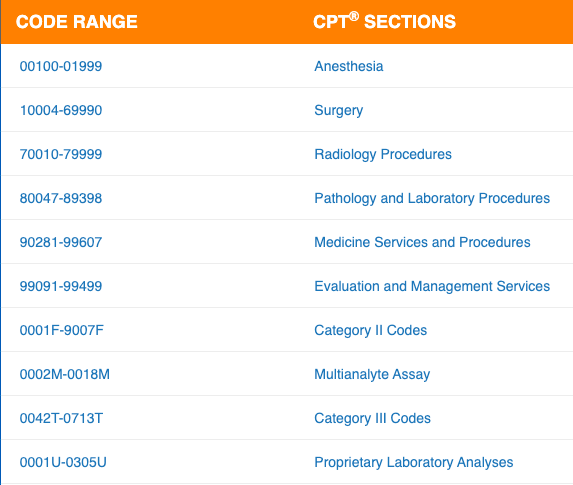

**Source**: https://www.aapc.com/codes/cpt-codes-range/ 


**There is a detailed list present here:** https://www.cms.gov/Medicare/Coding/ICD9ProviderDiagnosticCodes/codes 

For the purpose of categorizing them into less no. of categories to all the family of codes, there is a full list present effective from October 2014. Reference has been taken from there.

**Providers** have different categories as per coding taxonomy list. These providers are nobody but the healthcare providers, which can be Doctors, Nurses and other health care workers, in Hospitals and Private Clinics.

**References for the provider codes**: https://taxonomy.nucc.org/ 

**Major Diagnostic Categories with range of codes**: https://en.wikipedia.org/wiki/Major_Diagnostic_Category 




### Train & Test Outpatient

In [27]:
train_outpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

In [28]:
train_outpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

In [29]:
train_outpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [30]:
train_outpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


#### outpatient shape

In [31]:
train_outpatient.shape

(517737, 27)

####**▶ Conclusion**

train-outpatient has approx. 517.7K rows and 27 columns

In [32]:
test_outpatient.shape

(125841, 27)

In [33]:
train_outpatient.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1        float64
ClmProcedureCode_2        float64
ClmProcedureCode_3        float64
ClmProcedureCode_4        float64
ClmProcedureCode_5        float64
ClmProcedureCode_6        float64
DeductibleAmtPaid           int64
ClmAdmitDiagnosisCode      object
dtype: object

In [34]:
test_outpatient.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1        float64
ClmProcedureCode_2        float64
ClmProcedureCode_3        float64
ClmProcedureCode_4        float64
ClmProcedureCode_5        float64
ClmProcedureCode_6        float64
DeductibleAmtPaid           int64
ClmAdmitDiagnosisCode      object
dtype: object

#### outpatient nulls-number and percentage-wise

In [35]:
train_outpatient.isnull().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician          1396
OperatingPhysician        427120
OtherPhysician            322691
ClmDiagnosisCode_1         10453
ClmDiagnosisCode_2        195380
ClmDiagnosisCode_3        314480
ClmDiagnosisCode_4        392141
ClmDiagnosisCode_5        443393
ClmDiagnosisCode_6        468981
ClmDiagnosisCode_7        484776
ClmDiagnosisCode_8        494825
ClmDiagnosisCode_9        502899
ClmDiagnosisCode_10       516654
ClmProcedureCode_1        517575
ClmProcedureCode_2        517701
ClmProcedureCode_3        517733
ClmProcedureCode_4        517735
ClmProcedureCode_5        517737
ClmProcedureCode_6        517737
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     412312
dtype: int64

In [36]:
test_outpatient.isnull().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician           316
OperatingPhysician        104237
OtherPhysician             78222
ClmDiagnosisCode_1          2578
ClmDiagnosisCode_2         47731
ClmDiagnosisCode_3         76575
ClmDiagnosisCode_4         95371
ClmDiagnosisCode_5        107875
ClmDiagnosisCode_6        114035
ClmDiagnosisCode_7        117871
ClmDiagnosisCode_8        120310
ClmDiagnosisCode_9        122278
ClmDiagnosisCode_10       125578
ClmProcedureCode_1        125807
ClmProcedureCode_2        125832
ClmProcedureCode_3        125839
ClmProcedureCode_4        125841
ClmProcedureCode_5        125841
ClmProcedureCode_6        125841
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     100036
dtype: int64

In [37]:
print((train_outpatient.isnull().sum()/train_outpatient.shape[0])*100, '%')

BeneID                      0.000000
ClaimID                     0.000000
ClaimStartDt                0.000000
ClaimEndDt                  0.000000
Provider                    0.000000
InscClaimAmtReimbursed      0.000000
AttendingPhysician          0.269635
OperatingPhysician         82.497484
OtherPhysician             62.327205
ClmDiagnosisCode_1          2.018979
ClmDiagnosisCode_2         37.737307
ClmDiagnosisCode_3         60.741264
ClmDiagnosisCode_4         75.741351
ClmDiagnosisCode_5         85.640586
ClmDiagnosisCode_6         90.582864
ClmDiagnosisCode_7         93.633640
ClmDiagnosisCode_8         95.574587
ClmDiagnosisCode_9         97.134066
ClmDiagnosisCode_10        99.790820
ClmProcedureCode_1         99.968710
ClmProcedureCode_2         99.993047
ClmProcedureCode_3         99.999227
ClmProcedureCode_4         99.999614
ClmProcedureCode_5        100.000000
ClmProcedureCode_6        100.000000
DeductibleAmtPaid           0.000000
ClmAdmitDiagnosisCode      79.637345
d

In [38]:
print((test_outpatient.isnull().sum()/test_outpatient.shape[0])*100, '%')

BeneID                      0.000000
ClaimID                     0.000000
ClaimStartDt                0.000000
ClaimEndDt                  0.000000
Provider                    0.000000
InscClaimAmtReimbursed      0.000000
AttendingPhysician          0.251111
OperatingPhysician         82.832304
OtherPhysician             62.159392
ClmDiagnosisCode_1          2.048617
ClmDiagnosisCode_2         37.929610
ClmDiagnosisCode_3         60.850597
ClmDiagnosisCode_4         75.786906
ClmDiagnosisCode_5         85.723254
ClmDiagnosisCode_6         90.618320
ClmDiagnosisCode_7         93.666611
ClmDiagnosisCode_8         95.604771
ClmDiagnosisCode_9         97.168649
ClmDiagnosisCode_10        99.791006
ClmProcedureCode_1         99.972982
ClmProcedureCode_2         99.992848
ClmProcedureCode_3         99.998411
ClmProcedureCode_4        100.000000
ClmProcedureCode_5        100.000000
ClmProcedureCode_6        100.000000
DeductibleAmtPaid           0.000000
ClmAdmitDiagnosisCode      79.493965
d

####**▶ Conclusion**

Maximum Claim Diagnosis Codes and Claim procedure codes are nulls in outpatient dataset.

## Data Preprocessing

### Train & Test Beneficiery

#### Preparing Age (From DOD & DOB) columns

In [39]:
# pd.to_datetime: https://www.geeksforgeeks.org/python-pandas-to_datetime/

train_beneficiery['DOB'] = pd.to_datetime(train_beneficiery['DOB'])
train_beneficiery['DOD'] = pd.to_datetime(train_beneficiery['DOD'])

test_beneficiery['DOB'] = pd.to_datetime(test_beneficiery['DOB'])
test_beneficiery['DOD'] = pd.to_datetime(test_beneficiery['DOD'])

In [40]:
print(train_beneficiery['DOB'].dtype)

print(test_beneficiery['DOB'].dtype)

datetime64[ns]
datetime64[ns]


In [41]:
# pd.to_datetime: https://www.kite.com/python/answers/how-to-calculate-a-pandas-dataframe-time-difference-between-two-columns-in-python
train_beneficiery['Age'] = (train_beneficiery['DOD']) - (train_beneficiery['DOB'])

test_beneficiery['Age'] = (test_beneficiery['DOD']) - (test_beneficiery['DOB'])

In [42]:
import numpy as np
# https://stackoverflow.com/a/59960315
train_beneficiery['Age'] = round(train_beneficiery['Age']/np.timedelta64(1, 'Y'), 0)

test_beneficiery['Age'] = round(test_beneficiery['Age']/np.timedelta64(1, 'Y'), 0)

In [43]:
# delete a column in pandas: https://www.datacamp.com/community/tutorials/pandas-drop-column?utm_source=adwords_ppc&utm_medium=cpc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=332602034364&utm_targetid=aud-299261629574:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=9061689&gclid=Cj0KCQiA6NOPBhCPARIsAHAy2zCNMSA_zcwMJZhuKCZUP0xksmtyjoV8wDb93G22Wp-8cT7ydYxUlD4aAkvwEALw_wcB
train_beneficiery.drop(['DOB', 'DOD'], axis = 'columns', inplace = True)

test_beneficiery.drop(['DOB', 'DOD'], axis = 'columns', inplace = True)

In [44]:
train_beneficiery['Age'].fillna(0, inplace = True)
test_beneficiery['Age'].fillna(0, inplace = True)

In [45]:
print(train_beneficiery['Age'].isnull().sum())

print(test_beneficiery['Age'].isnull().sum())

0
0


In [46]:
train_beneficiery['Age'] = train_beneficiery['Age'].astype('int')

In [47]:
test_beneficiery['Age'] = test_beneficiery['Age'].astype('int')

In [48]:
train_beneficiery['Age'].value_counts()

0     137135
68        79
67        76
74        67
75        62
       ...  
41         1
40         1
42         1
39         1
36         1
Name: Age, Length: 65, dtype: int64

In [49]:
test_beneficiery['Age'].value_counts()

0      63394
75        32
68        31
74        29
67        26
77        23
80        23
81        21
73        19
84        18
82        18
66        18
79        18
70        18
69        17
86        17
78        16
71        16
85        16
72        16
88        14
90        13
83        13
76        11
87         9
89         8
54         7
91         6
55         6
65         6
63         6
61         6
53         5
51         5
64         5
59         5
52         5
50         4
57         4
94         4
46         3
62         3
100        3
93         3
58         3
99         3
95         3
43         2
96         2
48         2
92         2
49         2
98         2
60         1
42         1
44         1
56         1
39         1
47         1
37         1
Name: Age, dtype: int64

#### Creating new isDead feature

In [50]:
train_beneficiery['isDead'] = train_beneficiery['Age'].replace(to_replace = 0, value='Yes')

test_beneficiery['isDead']  = test_beneficiery['Age'].replace(to_replace = 0, value='Yes')

In [51]:
s_train_isDead = pd.Series(train_beneficiery['isDead'])
train_beneficiery['isDead'] = s_train_isDead.mask(s_train_isDead != 'Yes', 'No')


s_test_isDead = pd.Series(test_beneficiery['isDead'])
test_beneficiery['isDead'] = s_test_isDead.mask(s_test_isDead != 'Yes', 'No')


In [52]:
print(train_beneficiery['isDead'].value_counts())

print(test_beneficiery['isDead'].value_counts())

Yes    137135
No       1421
Name: isDead, dtype: int64
Yes    63394
No       574
Name: isDead, dtype: int64


In [53]:
train_beneficiery.columns

Index(['BeneID', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age', 'isDead'],
      dtype='object')

In [54]:
test_beneficiery.columns

Index(['BeneID', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age', 'isDead'],
      dtype='object')

#### BeneID, Gender & Race

In [55]:
print(train_beneficiery[['BeneID', 'Gender', 'Race']].isnull().sum())

print(test_beneficiery[['BeneID', 'Gender', 'Race']].isnull().sum())

BeneID    0
Gender    0
Race      0
dtype: int64
BeneID    0
Gender    0
Race      0
dtype: int64


#### Preparing Patient's Risk Score (From Chronic Conditions) column

In [56]:
print(train_beneficiery[['RenalDiseaseIndicator', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', \
                         'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', \
                         'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', \
                         'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis', \
                         'ChronicCond_stroke']].isnull().sum())

print(test_beneficiery[['RenalDiseaseIndicator', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', \
                         'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', \
                         'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', \
                         'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis', \
                         'ChronicCond_stroke']].isnull().sum())

RenalDiseaseIndicator              0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
dtype: int64
RenalDiseaseIndicator              0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
dtype: int64


In [57]:
# Train & Test RenalDiseaseIndicator
s_train_RenalDiseaseIndicator = pd.Series(train_beneficiery['RenalDiseaseIndicator'])
train_beneficiery['RenalDiseaseIndicator'] = s_train_RenalDiseaseIndicator.mask(s_train_RenalDiseaseIndicator == 'Y', '1')

s_test_RenalDiseaseIndicator = pd.Series(test_beneficiery['RenalDiseaseIndicator'])
test_beneficiery['RenalDiseaseIndicator'] = s_test_RenalDiseaseIndicator.mask(s_test_RenalDiseaseIndicator == 'Y', '1')

# Train & Test ChronicCond_Alzheimer
s_train_ChronicCond_Alzheimer = pd.Series(train_beneficiery['ChronicCond_Alzheimer'])
train_beneficiery['ChronicCond_Alzheimer'] = s_train_ChronicCond_Alzheimer.mask(s_train_ChronicCond_Alzheimer == 2, 0)

s_test_ChronicCond_Alzheimer = pd.Series(test_beneficiery['ChronicCond_Alzheimer'])
test_beneficiery['ChronicCond_Alzheimer'] = s_test_ChronicCond_Alzheimer.mask(s_test_ChronicCond_Alzheimer == 2, 0)

# Train & Test ChronicCond_Heartfailure
s_train_ChronicCond_Heartfailure = pd.Series(train_beneficiery['ChronicCond_Heartfailure'])
train_beneficiery['ChronicCond_Heartfailure'] = s_train_ChronicCond_Heartfailure.mask(s_train_ChronicCond_Heartfailure == 2, 0)

s_test_ChronicCond_Heartfailure = pd.Series(test_beneficiery['ChronicCond_Heartfailure'])
test_beneficiery['ChronicCond_Heartfailure'] = s_test_ChronicCond_Heartfailure.mask(s_test_ChronicCond_Heartfailure == 2, 0)

# Train & Test ChronicCond_KidneyDisease
s_train_ChronicCond_KidneyDisease = pd.Series(train_beneficiery['ChronicCond_KidneyDisease'])
train_beneficiery['ChronicCond_KidneyDisease'] = s_train_ChronicCond_KidneyDisease.mask(s_train_ChronicCond_KidneyDisease == 2, 0)

s_test_ChronicCond_KidneyDisease = pd.Series(test_beneficiery['ChronicCond_KidneyDisease'])
test_beneficiery['ChronicCond_KidneyDisease'] = s_test_ChronicCond_KidneyDisease.mask(s_test_ChronicCond_KidneyDisease == 2, 0)

# Train & Test ChronicCond_Cancer
s_train_ChronicCond_Cancer = pd.Series(train_beneficiery['ChronicCond_Cancer'])
train_beneficiery['ChronicCond_Cancer'] = s_train_ChronicCond_Cancer.mask(s_train_ChronicCond_Cancer == 2, 0)

s_test_ChronicCond_Cancer = pd.Series(test_beneficiery['ChronicCond_Cancer'])
test_beneficiery['ChronicCond_Cancer'] = s_test_ChronicCond_Cancer.mask(s_test_ChronicCond_Cancer == 2, 0)

# Train & Test ChronicCond_ObstrPulmonary
s_train_ChronicCond_ObstrPulmonary = pd.Series(train_beneficiery['ChronicCond_ObstrPulmonary'])
train_beneficiery['ChronicCond_ObstrPulmonary'] = s_train_ChronicCond_ObstrPulmonary.mask(s_train_ChronicCond_ObstrPulmonary == 2, 0)


s_test_ChronicCond_ObstrPulmonary = pd.Series(test_beneficiery['ChronicCond_ObstrPulmonary'])
test_beneficiery['ChronicCond_ObstrPulmonary'] = s_test_ChronicCond_ObstrPulmonary.mask(s_test_ChronicCond_ObstrPulmonary == 2, 0)

# Train & Test ChronicCond_Depression
s_train_ChronicCond_Depression = pd.Series(train_beneficiery['ChronicCond_Depression'])
train_beneficiery['ChronicCond_Depression'] = s_train_ChronicCond_Depression.mask(s_train_ChronicCond_Depression == 2, 0)

s_test_ChronicCond_Depression = pd.Series(test_beneficiery['ChronicCond_Depression'])
test_beneficiery['ChronicCond_Depression'] = s_test_ChronicCond_Depression.mask(s_test_ChronicCond_Depression == 2, 0)

# Train & Test ChronicCond_Diabetes
s_train_ChronicCond_Diabetes = pd.Series(train_beneficiery['ChronicCond_Diabetes'])
train_beneficiery['ChronicCond_Diabetes'] = s_train_ChronicCond_Diabetes.mask(s_train_ChronicCond_Diabetes == 2, 0)

s_test_ChronicCond_Diabetes = pd.Series(test_beneficiery['ChronicCond_Diabetes'])
test_beneficiery['ChronicCond_Diabetes'] = s_test_ChronicCond_Diabetes.mask(s_test_ChronicCond_Diabetes == 2, 0)

# Train & Test ChronicCond_IschemicHeart
s_train_ChronicCond_IschemicHeart = pd.Series(train_beneficiery['ChronicCond_IschemicHeart'])
train_beneficiery['ChronicCond_IschemicHeart'] = s_train_ChronicCond_IschemicHeart.mask(s_train_ChronicCond_IschemicHeart == 2, 0)

s_test_ChronicCond_IschemicHeart = pd.Series(test_beneficiery['ChronicCond_IschemicHeart'])
test_beneficiery['ChronicCond_IschemicHeart'] = s_test_ChronicCond_IschemicHeart.mask(s_test_ChronicCond_IschemicHeart == 2, 0)

# Train & Test ChronicCond_Osteoporasis
s_train_ChronicCond_Osteoporasis = pd.Series(train_beneficiery['ChronicCond_Osteoporasis'])
train_beneficiery['ChronicCond_Osteoporasis'] = s_train_ChronicCond_Osteoporasis.mask(s_train_ChronicCond_Osteoporasis == 2, 0)

s_test_ChronicCond_Osteoporasis = pd.Series(test_beneficiery['ChronicCond_Osteoporasis'])
test_beneficiery['ChronicCond_Osteoporasis'] = s_test_ChronicCond_Osteoporasis.mask(s_test_ChronicCond_Osteoporasis == 2, 0)

# Train & Test ChronicCond_rheumatoidarthritis
s_train_ChronicCond_rheumatoidarthritis = pd.Series(train_beneficiery['ChronicCond_rheumatoidarthritis'])
train_beneficiery['ChronicCond_rheumatoidarthritis'] = s_train_ChronicCond_rheumatoidarthritis.mask(s_train_ChronicCond_rheumatoidarthritis == 2, 0)

s_test_ChronicCond_rheumatoidarthritis = pd.Series(test_beneficiery['ChronicCond_rheumatoidarthritis'])
test_beneficiery['ChronicCond_rheumatoidarthritis'] = s_test_ChronicCond_rheumatoidarthritis.mask(s_test_ChronicCond_rheumatoidarthritis == 2, 0)

# Train & Test ChronicCond_stroke
s_train_ChronicCond_stroke = pd.Series(train_beneficiery['ChronicCond_stroke'])
train_beneficiery['ChronicCond_stroke'] = s_train_ChronicCond_stroke.mask(s_train_ChronicCond_stroke == 2, 0)

s_test_ChronicCond_stroke = pd.Series(test_beneficiery['ChronicCond_stroke'])
test_beneficiery['ChronicCond_stroke'] = s_test_ChronicCond_stroke.mask(s_test_ChronicCond_stroke == 2, 0)



In [58]:
train_beneficiery['Risk_Score'] = train_beneficiery['RenalDiseaseIndicator'].astype('int') + \
                                  train_beneficiery['ChronicCond_Alzheimer'].astype('int')  + \
                                  train_beneficiery['ChronicCond_Heartfailure'].astype('int') + \
                                  train_beneficiery['ChronicCond_KidneyDisease'].astype('int')  + \
                                  train_beneficiery['ChronicCond_Cancer'].astype('int')  + \
                                  train_beneficiery['ChronicCond_ObstrPulmonary'].astype('int') + \
                                  train_beneficiery['ChronicCond_Depression'].astype('int')  + \
                                  train_beneficiery['ChronicCond_Diabetes'].astype('int')  + \
                                  train_beneficiery['ChronicCond_IschemicHeart'].astype('int') + \
                                  train_beneficiery['ChronicCond_Osteoporasis'].astype('int')  + \
                                  train_beneficiery['ChronicCond_rheumatoidarthritis'].astype('int') + \
                                  train_beneficiery['ChronicCond_stroke'].astype('int')

test_beneficiery['Risk_Score'] = test_beneficiery['RenalDiseaseIndicator'].astype('int') + \
                                  test_beneficiery['ChronicCond_Alzheimer'].astype('int')  + \
                                  test_beneficiery['ChronicCond_Heartfailure'].astype('int') + \
                                  test_beneficiery['ChronicCond_KidneyDisease'].astype('int')  + \
                                  test_beneficiery['ChronicCond_Cancer'].astype('int')  + \
                                  test_beneficiery['ChronicCond_ObstrPulmonary'].astype('int') + \
                                  test_beneficiery['ChronicCond_Depression'].astype('int')  + \
                                  test_beneficiery['ChronicCond_Diabetes'].astype('int')  + \
                                  test_beneficiery['ChronicCond_IschemicHeart'].astype('int') + \
                                  test_beneficiery['ChronicCond_Osteoporasis'].astype('int')  + \
                                  test_beneficiery['ChronicCond_rheumatoidarthritis'].astype('int') + \
                                  test_beneficiery['ChronicCond_stroke'].astype('int')


In [59]:
print(train_beneficiery['Risk_Score'].value_counts())

print(test_beneficiery['Risk_Score'].value_counts())

3     19649
4     19257
2     18994
5     16716
1     15868
6     14120
0     11081
7     10686
8      6995
9      3499
10     1362
11      295
12       34
Name: Risk_Score, dtype: int64
4     9015
3     8754
5     8345
2     7752
6     7445
1     5979
7     5933
8     4036
0     3551
9     2087
10     857
11     187
12      27
Name: Risk_Score, dtype: int64


#### Dropping unnecessary columns

In [60]:
train_beneficiery.drop(['RenalDiseaseIndicator', \
                         'ChronicCond_Alzheimer', \
                         'ChronicCond_Heartfailure', \
                         'ChronicCond_KidneyDisease', \
                         'ChronicCond_Cancer', \
                         'ChronicCond_ObstrPulmonary', \
                         'ChronicCond_Depression', \
                         'ChronicCond_Diabetes', \
                         'ChronicCond_IschemicHeart', \
                         'ChronicCond_Osteoporasis', \
                         'ChronicCond_rheumatoidarthritis', \
                         'ChronicCond_stroke'], inplace = True, axis = 'columns')

test_beneficiery.drop(['RenalDiseaseIndicator', \
                        'ChronicCond_Alzheimer', \
                        'ChronicCond_Heartfailure', \
                        'ChronicCond_KidneyDisease', \
                        'ChronicCond_Cancer', \
                        'ChronicCond_ObstrPulmonary', \
                        'ChronicCond_Depression', \
                        'ChronicCond_Diabetes', \
                        'ChronicCond_IschemicHeart', \
                        'ChronicCond_Osteoporasis', \
                        'ChronicCond_rheumatoidarthritis', \
                        'ChronicCond_stroke'], inplace = True, axis = 'columns')


#### Inpatient Annual Reimbursement & Deductible Amounts

In [61]:
print(train_beneficiery[['IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt']].isnull().sum())

print(test_beneficiery[['IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt']].isnull().sum())

IPAnnualReimbursementAmt    0
IPAnnualDeductibleAmt       0
dtype: int64
IPAnnualReimbursementAmt    0
IPAnnualDeductibleAmt       0
dtype: int64


#### Outpatient Annual Reimbursement & Deductible Amounts

In [62]:
print(train_beneficiery[['OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']].isnull().sum())

print(test_beneficiery[['OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']].isnull().sum())

OPAnnualReimbursementAmt    0
OPAnnualDeductibleAmt       0
dtype: int64
OPAnnualReimbursementAmt    0
OPAnnualDeductibleAmt       0
dtype: int64


In [63]:
print(train_beneficiery.columns)

print(test_beneficiery.columns)

Index(['BeneID', 'Gender', 'Race', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'Age', 'isDead', 'Risk_Score'],
      dtype='object')
Index(['BeneID', 'Gender', 'Race', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'Age', 'isDead', 'Risk_Score'],
      dtype='object')


In [64]:
print(train_beneficiery.dtypes)

print(test_beneficiery.dtypes)

BeneID                      object
Gender                       int64
Race                         int64
State                        int64
County                       int64
NoOfMonths_PartACov          int64
NoOfMonths_PartBCov          int64
IPAnnualReimbursementAmt     int64
IPAnnualDeductibleAmt        int64
OPAnnualReimbursementAmt     int64
OPAnnualDeductibleAmt        int64
Age                          int64
isDead                      object
Risk_Score                   int64
dtype: object
BeneID                      object
Gender                       int64
Race                         int64
State                        int64
County                       int64
NoOfMonths_PartACov          int64
NoOfMonths_PartBCov          int64
IPAnnualReimbursementAmt     int64
IPAnnualDeductibleAmt        int64
OPAnnualReimbursementAmt     int64
OPAnnualDeductibleAmt        int64
Age                          int64
isDead                      object
Risk_Score                   int64
dtype:

### Train & Test Inpatient

#### Claim Duration(From ClaimStartDt and ClaimEndDt) columns

In [65]:
# pd.to_datetime: https://www.geeksforgeeks.org/python-pandas-to_datetime/

train_inpatient['ClaimStartDt'] = pd.to_datetime(train_inpatient['ClaimStartDt'])
train_inpatient['ClaimEndDt'] = pd.to_datetime(train_inpatient['ClaimEndDt'])

test_inpatient['ClaimStartDt'] = pd.to_datetime(test_inpatient['ClaimStartDt'])
test_inpatient['ClaimEndDt'] = pd.to_datetime(test_inpatient['ClaimEndDt'])

In [66]:
print(train_inpatient['ClaimStartDt'].dtype)

print(test_inpatient['ClaimStartDt'].dtype)

datetime64[ns]
datetime64[ns]


In [67]:
# pd.to_datetime: https://www.kite.com/python/answers/how-to-calculate-a-pandas-dataframe-time-difference-between-two-columns-in-python
train_inpatient['Claim_duration_inpatient'] = (train_inpatient['ClaimEndDt']) - (train_inpatient['ClaimStartDt'])

test_inpatient['Claim_duration_inpatient'] = (test_inpatient['ClaimEndDt']) - (test_inpatient['ClaimStartDt'])

In [68]:
train_inpatient['Claim_duration_inpatient'] = train_inpatient['Claim_duration_inpatient'].astype('str').str.replace(pat = r" days", repl = '').astype('int')

In [69]:
test_inpatient['Claim_duration_inpatient'] = test_inpatient['Claim_duration_inpatient'].astype('str').str.replace(pat = r" days", repl = '').astype('int')

In [70]:
train_inpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Claim_duration_inpatient
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,2
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,8
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,17


In [71]:
test_inpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Claim_duration_inpatient
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,...,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN,7
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,...,29570,34831,NaN,5551.0,NaN,NaN,NaN,NaN,NaN,14
2,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,NaN,NaN,2009-12-09,...,7813,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
3,BENE11031,CLM56810,2009-06-23,2009-07-06,PRV55825,16000,PHY429538,PHY371893,NaN,2009-06-23,...,41400,5849,41401,8152.0,3320.0,NaN,NaN,NaN,NaN,13
4,BENE11085,CLM34625,2009-01-20,2009-01-31,PRV52338,19000,PHY397161,NaN,NaN,2009-01-20,...,7242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11


In [72]:
# delete a column in pandas: https://www.datacamp.com/community/tutorials/pandas-drop-column?utm_source=adwords_ppc&utm_medium=cpc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=332602034364&utm_targetid=aud-299261629574:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=9061689&gclid=Cj0KCQiA6NOPBhCPARIsAHAy2zCNMSA_zcwMJZhuKCZUP0xksmtyjoV8wDb93G22Wp-8cT7ydYxUlD4aAkvwEALw_wcB
train_inpatient.drop(['ClaimStartDt', 'ClaimEndDt'], axis = 'columns', inplace = True)

test_inpatient.drop(['ClaimStartDt', 'ClaimEndDt'], axis = 'columns', inplace = True)

In [73]:
train_inpatient.columns

Index(['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed',
       'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'AdmissionDt', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid',
       'DischargeDt', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
       'Claim_duration_inpatient'],
      dtype='object')

In [74]:
train_outpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

#### Physicians(From Attending, Operating & Other) columns

In [75]:
train_inpatient['AttendingPhysician'].fillna('None', inplace = True)
train_inpatient['OperatingPhysician'].fillna('None', inplace = True)
train_inpatient['OtherPhysician'].fillna('None', inplace = True)

test_inpatient['AttendingPhysician'].fillna('None', inplace = True)
test_inpatient['OperatingPhysician'].fillna('None', inplace = True)
test_inpatient['OtherPhysician'].fillna('None', inplace = True)

In [76]:
# pandas remove numbers from string: https://stackoverflow.com/a/41719470/10974488
train_inpatient['AttendingPhysician'] = train_inpatient['AttendingPhysician'].str.replace('\d+', '')
train_inpatient['OperatingPhysician'] = train_inpatient['OperatingPhysician'].str.replace('\d+', '')
train_inpatient['OtherPhysician'] = train_inpatient['OtherPhysician'].str.replace('\d+', '')
train_inpatient['AttendingPhysician'].replace(to_replace = 'PHY', value = 'AP', inplace = True )
train_inpatient['OperatingPhysician'].replace(to_replace = 'PHY', value = 'OPP', inplace = True )
train_inpatient['OtherPhysician'].replace(to_replace = 'PHY', value = 'OTP', inplace = True )

test_inpatient['AttendingPhysician'] = test_inpatient['AttendingPhysician'].str.replace('\d+', '')
test_inpatient['OperatingPhysician'] = test_inpatient['OperatingPhysician'].str.replace('\d+', '')
test_inpatient['OtherPhysician'] = test_inpatient['OtherPhysician'].str.replace('\d+', '')
test_inpatient['AttendingPhysician'].replace(to_replace = 'PHY', value = 'AP', inplace = True )
test_inpatient['OperatingPhysician'].replace(to_replace = 'PHY', value = 'OPP', inplace = True )
test_inpatient['OtherPhysician'].replace(to_replace = 'PHY', value = 'OTP', inplace = True )

In [77]:
# concatenate columns pandas: https://pandas.pydata.org/docs/reference/api/pandas.concat.html
train_inpatient['Physicians_inpatient'] = train_inpatient['AttendingPhysician'] + train_inpatient['OperatingPhysician'] + train_inpatient['OtherPhysician']

test_inpatient['Physicians_inpatient'] = test_inpatient['AttendingPhysician'] + test_inpatient['OperatingPhysician'] + test_inpatient['OtherPhysician']

In [78]:
print(train_inpatient['Physicians_inpatient'].value_counts())

print(test_inpatient['Physicians_inpatient'].value_counts())

APOPPNone       20413
APNoneNone      15260
APOPPOTP         3411
APNoneOTP        1278
NoneNoneNone      106
NoneOPPNone         5
NoneOPPOTP          1
Name: Physicians_inpatient, dtype: int64
APOPPNone       4838
APNoneNone      3669
APOPPOTP         749
APNoneOTP        264
NoneNoneNone      29
NoneOPPNone        2
Name: Physicians_inpatient, dtype: int64


In [79]:
train_inpatient['Physicians_inpatient'].replace(to_replace = 'APNoneNone', value = 'AP', inplace = True)
train_inpatient['Physicians_inpatient'].replace(to_replace = 'APNoneOTP', value = 'AP_OTP', inplace = True)
train_inpatient['Physicians_inpatient'].replace(to_replace = 'APOPPNone', value = 'AP_OPP', inplace = True)
train_inpatient['Physicians_inpatient'].replace(to_replace = 'APOPPOTP', value = 'AP_OPP_OTP', inplace = True)
train_inpatient['Physicians_inpatient'].replace(to_replace = 'NoneNoneNone', value = 'None', inplace = True)
train_inpatient['Physicians_inpatient'].replace(to_replace = 'NoneOPPNone', value = 'OPP', inplace = True)
train_inpatient['Physicians_inpatient'].replace(to_replace = 'NoneNoneOTP', value = 'OTP', inplace = True)
train_inpatient['Physicians_inpatient'].replace(to_replace = 'NoneOPPOTP', value = 'OPP_OTP', inplace = True)

test_inpatient['Physicians_inpatient'].replace(to_replace = 'APNoneNone', value = 'AP', inplace = True)
test_inpatient['Physicians_inpatient'].replace(to_replace = 'APNoneOTP', value = 'AP_OTP', inplace = True)
test_inpatient['Physicians_inpatient'].replace(to_replace = 'APOPPNone', value = 'AP_OPP', inplace = True)
test_inpatient['Physicians_inpatient'].replace(to_replace = 'APOPPOTP', value = 'AP_OPP_OTP', inplace = True)
test_inpatient['Physicians_inpatient'].replace(to_replace = 'NoneNoneNone', value = 'None', inplace = True)
test_inpatient['Physicians_inpatient'].replace(to_replace = 'NoneOPPNone', value = 'OPP', inplace = True)
test_inpatient['Physicians_inpatient'].replace(to_replace = 'NoneNoneOTP', value = 'OTP', inplace = True)
test_inpatient['Physicians_inpatient'].replace(to_replace = 'NoneOPPOTP', value = 'OPP_OTP', inplace = True)

In [80]:
print(train_inpatient['Physicians_inpatient'].value_counts())
print(test_inpatient['Physicians_inpatient'].value_counts())

AP_OPP        20413
AP            15260
AP_OPP_OTP     3411
AP_OTP         1278
None            106
OPP               5
OPP_OTP           1
Name: Physicians_inpatient, dtype: int64
AP_OPP        4838
AP            3669
AP_OPP_OTP     749
AP_OTP         264
None            29
OPP              2
Name: Physicians_inpatient, dtype: int64


In [81]:
# delete a column in pandas: https://www.datacamp.com/community/tutorials/pandas-drop-column?utm_source=adwords_ppc&utm_medium=cpc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=332602034364&utm_targetid=aud-299261629574:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=9061689&gclid=Cj0KCQiA6NOPBhCPARIsAHAy2zCNMSA_zcwMJZhuKCZUP0xksmtyjoV8wDb93G22Wp-8cT7ydYxUlD4aAkvwEALw_wcB
train_inpatient.drop(['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician'], axis = 'columns', inplace = True)

test_inpatient.drop(['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician'], axis = 'columns', inplace = True)

In [82]:
train_inpatient.columns

Index(['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed',
       'AdmissionDt', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid',
       'DischargeDt', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
       'Claim_duration_inpatient', 'Physicians_inpatient'],
      dtype='object')

In [83]:
test_inpatient.columns

Index(['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed',
       'AdmissionDt', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid',
       'DischargeDt', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
       'Claim_duration_inpatient', 'Physicians_inpatient'],
      dtype='object')

#### Hospital Stay Duration (From AdmissionDt and DischargeDt) columns

In [84]:
# pd.to_datetime: https://www.geeksforgeeks.org/python-pandas-to_datetime/

train_inpatient['DischargeDt'] = pd.to_datetime(train_inpatient['DischargeDt'])
train_inpatient['AdmissionDt'] = pd.to_datetime(train_inpatient['AdmissionDt'])

test_inpatient['DischargeDt'] = pd.to_datetime(test_inpatient['DischargeDt'])
test_inpatient['AdmissionDt'] = pd.to_datetime(test_inpatient['AdmissionDt'])

In [85]:
# pd.to_datetime: https://www.kite.com/python/answers/how-to-calculate-a-pandas-dataframe-time-difference-between-two-columns-in-python
train_inpatient['Hospital_Stay_Duration'] = (train_inpatient['DischargeDt']) - (train_inpatient['AdmissionDt'])

test_inpatient['Hospital_Stay_Duration'] = (test_inpatient['DischargeDt']) - (test_inpatient['AdmissionDt'])

In [86]:
print(train_inpatient['Hospital_Stay_Duration'])

print(test_inpatient['Hospital_Stay_Duration'])

0        6 days
1        2 days
2        3 days
3        8 days
4       17 days
          ...  
40469    4 days
40470    3 days
40471    4 days
40472    1 days
40473    8 days
Name: Hospital_Stay_Duration, Length: 40474, dtype: timedelta64[ns]
0       7 days
1      14 days
2       4 days
3      13 days
4      11 days
         ...  
9546    2 days
9547   13 days
9548   35 days
9549    3 days
9550    1 days
Name: Hospital_Stay_Duration, Length: 9551, dtype: timedelta64[ns]


#### dropping uneccesary columns

In [87]:
# delete a column in pandas: https://www.datacamp.com/community/tutorials/pandas-drop-column?utm_source=adwords_ppc&utm_medium=cpc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=332602034364&utm_targetid=aud-299261629574:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=9061689&gclid=Cj0KCQiA6NOPBhCPARIsAHAy2zCNMSA_zcwMJZhuKCZUP0xksmtyjoV8wDb93G22Wp-8cT7ydYxUlD4aAkvwEALw_wcB
train_inpatient.drop(['AdmissionDt', 'DischargeDt'], axis = 'columns', inplace = True)

test_inpatient.drop(['AdmissionDt', 'DischargeDt'], axis = 'columns', inplace = True)

In [88]:
train_inpatient['Hospital_Stay_Duration'] = train_inpatient['Hospital_Stay_Duration'].astype('str').str.replace(pat = r" days", repl = '').astype('int')

In [89]:
test_inpatient['Hospital_Stay_Duration'] = test_inpatient['Hospital_Stay_Duration'].astype('str').str.replace(pat = r" days", repl = '').astype('int')

In [90]:
train_inpatient.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,...,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Claim_duration_inpatient,Physicians_inpatient,Hospital_Stay_Duration
0,BENE11001,CLM46614,PRV55912,26000,7866,1068.0,201,1970,4019,5853,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,AP,6
1,BENE11001,CLM66048,PRV55907,5000,6186,1068.0,750,6186,2948,56400,...,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,2,AP_OPP,2
2,BENE11001,CLM68358,PRV56046,5000,29590,1068.0,883,29623,30390,71690,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,AP_OTP,3
3,BENE11011,CLM38412,PRV52405,5000,431,1068.0,067,43491,2762,7843,...,NaN,331.0,NaN,NaN,NaN,NaN,NaN,8,AP_OPP_OTP,8
4,BENE11014,CLM63689,PRV56614,10000,78321,1068.0,975,042,3051,34400,...,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,17,AP_OPP,17


In [91]:
test_inpatient.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,...,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Claim_duration_inpatient,Physicians_inpatient,Hospital_Stay_Duration
0,BENE11014,CLM67387,PRV57070,9000,5789,1068.0,332,5780,5533,496,...,4280,4443.0,5849.0,NaN,NaN,NaN,NaN,7,AP_OPP,7
1,BENE11017,CLM31237,PRV54750,14000,5939,1068.0,661,1889,41071,5990,...,NaN,5551.0,NaN,NaN,NaN,NaN,NaN,14,AP_OPP,14
2,BENE11026,CLM78930,PRV53758,2000,4019,1068.0,241,4010,78791,60000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,AP,4
3,BENE11031,CLM56810,PRV55825,16000,8208,1068.0,564,8208,4168,920,...,41401,8152.0,3320.0,NaN,NaN,NaN,NaN,13,AP_OPP,13
4,BENE11085,CLM34625,PRV52338,19000,4279,1068.0,880,29654,V142,78702,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,AP,11


In [92]:
train_inpatient.columns

Index(['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed',
       'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Claim_duration_inpatient',
       'Physicians_inpatient', 'Hospital_Stay_Duration'],
      dtype='object')

In [93]:
test_inpatient.columns

Index(['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed',
       'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Claim_duration_inpatient',
       'Physicians_inpatient', 'Hospital_Stay_Duration'],
      dtype='object')

#### Preparing Diagnosis Group Codes

##### Pre-MDC 001 - 017

In [94]:
# how to prefix prefix in str in python: https://stackoverflow.com/a/33941393/10974488
pre_mdc1 = [f"00{i}" for i in range(1,10)]
pre_mdc2 = [f"0{i}" for i in range(10, 18)]
pre_mdc = pre_mdc1+pre_mdc2

s_DiagnosisGroupCode1 = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode1.mask(s_DiagnosisGroupCode1.isin(pre_mdc), 'Pre-MDC')

##### Diseases and Disorders of the Nervous System 020 - 103


In [95]:
# how to prefix prefix in str in python: https://stackoverflow.com/a/33941393/10974488
ns1 = [f"0{i}" for i in range(20,100)]
ns2 = [f"{i}" for i in range(100, 104)]
ns = ns1+ns2

s_DiagnosisGroupCode2 = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode2.mask(s_DiagnosisGroupCode2.isin(ns), 'Nervous-System')


##### Diseases and Disorders of the Eye 113 - 125


In [96]:
eye = [f"{i}" for i in range(113, 126)]


s_DiagnosisGroupCode3 = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode3.mask(s_DiagnosisGroupCode3.isin(eye), 'Eye')

##### Diseases and Disorders of the Ear, Nose, Mouth And Throat 129 - 159


In [97]:
ent = [f"{i}" for i in range(129, 160)]


s_DiagnosisGroupCode4 = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode4.mask(s_DiagnosisGroupCode4.isin(ent), 'ENT')

##### Diseases and Disorders of the Respiratory System 163 - 208


In [98]:
respiratory = [f"{i}" for i in range(163, 209)]


s_DiagnosisGroupCode5 = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode5.mask(s_DiagnosisGroupCode5.isin(respiratory), 'Respiratory')

##### Diseases and Disorders of the Circulatory System 215 - 316


In [99]:
circulatory = [f"{i}" for i in range(215, 317)]


s_DiagnosisGroupCode6 = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode6.mask(s_DiagnosisGroupCode6.isin(circulatory), 'Circulatory')

##### Diseases and Disorders of the Digestive System 326 - 395


In [100]:
digestive = [f"{i}" for i in range(326, 396)]


s_DiagnosisGroupCode7 = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode7.mask(s_DiagnosisGroupCode7.isin(digestive), 'Digestive')

##### Diseases and Disorders of the Hepatobiliary System And Pancreas 405 - 446

In [101]:
hepatobiliary = [f"{i}" for i in range(405, 447)]


s_DiagnosisGroupCode8 = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode8.mask(s_DiagnosisGroupCode8.isin(hepatobiliary), 'Hepatobiliary')

##### Diseases and Disorders of the Musculoskeletal System And Connective Tissue 453 - 566


In [102]:
musculoskeletal = [f"{i}" for i in range(453, 567)]


s_DiagnosisGroupCode9 = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode9.mask(s_DiagnosisGroupCode9.isin(musculoskeletal), 'Musculoskeletal')

##### Diseases and Disorders of the Skin, Subcutaneous Tissue And Breast 573 - 607


In [103]:
skin_tissue = [f"{i}" for i in range(573, 608)]


s_DiagnosisGroupCode10 = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode10.mask(s_DiagnosisGroupCode10.isin(skin_tissue), 'Skin_Tissue')

##### Diseases and Disorders of the Endocrine, Nutritional And Metabolic System 614 - 645


In [104]:
endocrine = [f"{i}" for i in range(614, 646)]


s_DiagnosisGroupCode11 = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode11.mask(s_DiagnosisGroupCode11.isin(endocrine), 'Endocrine')

##### Diseases and Disorders of the Kidney And Urinary Tract 652 - 700


In [105]:
nephrology = [f"{i}" for i in range(652, 701)]


s_DiagnosisGroupCode12 = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode12.mask(s_DiagnosisGroupCode12.isin(nephrology), 'Nephrology')

##### Diseases and Disorders of the Male Reproductive System 707 - 730


In [106]:
andrology = [f"{i}" for i in range(707, 731)]


s_DiagnosisGroupCode13 = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode13.mask(s_DiagnosisGroupCode13.isin(andrology), 'Andrology')

##### Diseases and Disorders of the Female Reproductive System 734 - 761


In [107]:
gynaecology = [f"{i}" for i in range(734, 762)]


s_DiagnosisGroupCode14 = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode14.mask(s_DiagnosisGroupCode14.isin(gynaecology), 'Gynaecology')

##### Pregnancy, Childbirth And Puerperium 765 - 782


In [108]:
obstetrics = [f"{i}" for i in range(765, 783)]


s_DiagnosisGroupCode15 = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode15.mask(s_DiagnosisGroupCode15.isin(obstetrics), 'Obstetrics')

##### Newborn And Other Neonates (Perinatal Period) 789 - 795


In [109]:
pediatrics = [f"{i}" for i in range(789, 796)]


s_DiagnosisGroupCode16 = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode16.mask(s_DiagnosisGroupCode16.isin(pediatrics), 'Pediatrics')

##### Diseases and Disorders of the Blood and Blood Forming Organs and Immunological Disorders 799 - 816


In [110]:
haematology = [f"{i}" for i in range(799, 817)]


s_DiagnosisGroupCode17 = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode17.mask(s_DiagnosisGroupCode17.isin(haematology), 'Haematology')

##### Myeloproliferative DDs (Poorly Differentiated Neoplasms 820 - 849


In [111]:
onco_pathology = [f"{i}" for i in range(820, 850)]


s_DiagnosisGroupCode18 = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode18.mask(s_DiagnosisGroupCode18.isin(onco_pathology), 'Onco-Pathology')

##### Infectious and Parasitic DDs (Systemic or unspecified sites) 853 - 872


In [112]:
pathology = [f"{i}" for i in range(853, 873)]


s_DiagnosisGroupCode19 = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode19.mask(s_DiagnosisGroupCode19.isin(pathology), 'Pathology')

##### Mental Diseases and Disorders 876 - 887


In [113]:
psych = [f"{i}" for i in range(876, 888)]


s_DiagnosisGroupCode20 = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode20.mask(s_DiagnosisGroupCode20.isin(psych), 'Psychology')

##### Alcohol/Drug Use or Induced Mental Disorders 894 - 897


In [114]:
psych_addiction = [f"{i}" for i in range(894, 898)]


s_DiagnosisGroupCode21 = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode21.mask(s_DiagnosisGroupCode21.isin(psych_addiction), 'Psychological_Addiction')

##### Injuries, Poison And Toxic Effect of Drugs 901 - 923


In [115]:
toxicology = [f"{i}" for i in range(901, 924)]


s_DiagnosisGroupCode22 = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode22.mask(s_DiagnosisGroupCode22.isin(toxicology), 'Toxicology')

##### Burns 927 - 935


In [116]:
dermatology = [f"{i}" for i in range(927, 936)]


s_DiagnosisGroupCode23 = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode23.mask(s_DiagnosisGroupCode23.isin(dermatology), 'Dermatology')

##### Factors Influencing Health Status and Other Contacts with Health Services 939 - 951


In [117]:
health_logistics = [f"{i}" for i in range(939, 952)]


s_DiagnosisGroupCode24 = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode24.mask(s_DiagnosisGroupCode24.isin(health_logistics), 'Health_Logistics')

##### Multiple Significant Trauma 955 - 965


In [118]:
trauma = [f"{i}" for i in range(955, 966)]


s_DiagnosisGroupCode25 = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode25.mask(s_DiagnosisGroupCode25.isin(trauma), 'Trauma')

##### Human Immunodeficiency Virus Infection 969 - 977


In [119]:
hiv_aids = [f"{i}" for i in range(969, 978)]


s_DiagnosisGroupCode26 = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode26.mask(s_DiagnosisGroupCode26.isin(hiv_aids), 'HIV-AIDS')

##### MDC Category Missing 981 - 989, 998 - 999

In [120]:
mdc = [f"{i}" for i in range(981, 990)] + ['998', '999']


s_DiagnosisGroupCode27 = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode27.mask(s_DiagnosisGroupCode27.isin(mdc), 'MDC')


##### Total Groups under Diagnosis Codes 

In [121]:
train_inpatient['DiagnosisGroupCode'].value_counts()

Circulatory                9121
Respiratory                5658
Musculoskeletal            4800
Digestive                  4068
Nervous-System             3012
Nephrology                 2526
Pathology                  1715
Endocrine                  1454
Health_Logistics           1440
Psychology                 1410
Hepatobiliary              1088
Skin_Tissue                 964
Haematology                 539
Toxicology                  436
Gynaecology                 338
ENT                         301
Andrology                   274
Onco-Pathology              254
Psychological_Addiction     253
MDC                         244
Pre-MDC                     166
000                         134
OTH                         113
Trauma                       44
Obstetrics                   42
HIV-AIDS                     40
Eye                          27
Dermatology                  13
Name: DiagnosisGroupCode, dtype: int64

### Train & Test Outpatient

#### Claim Duration(From ClaimStartDt and ClaimEndDt) feature

In [122]:
# pd.to_datetime: https://www.geeksforgeeks.org/python-pandas-to_datetime/

train_outpatient['ClaimStartDt'] = pd.to_datetime(train_outpatient['ClaimStartDt'])
train_outpatient['ClaimEndDt'] = pd.to_datetime(train_outpatient['ClaimEndDt'])
test_outpatient['ClaimStartDt'] = pd.to_datetime(test_outpatient['ClaimStartDt'])
test_outpatient['ClaimEndDt'] = pd.to_datetime(test_outpatient['ClaimEndDt'])

In [123]:
print(train_outpatient['ClaimStartDt'].dtype)
print(test_outpatient['ClaimStartDt'].dtype)

datetime64[ns]
datetime64[ns]


In [124]:
# pd.to_datetime: https://www.kite.com/python/answers/how-to-calculate-a-pandas-dataframe-time-difference-between-two-columns-in-python
train_outpatient['Claim_duration_outpatient'] = (train_outpatient['ClaimEndDt']) - (train_outpatient['ClaimStartDt'])
test_outpatient['Claim_duration_outpatient'] = (test_outpatient['ClaimEndDt']) - (test_outpatient['ClaimStartDt'])

In [125]:
train_outpatient['Claim_duration_outpatient']

0        0 days
1        0 days
2        0 days
3        0 days
4        0 days
          ...  
517732   0 days
517733   0 days
517734   0 days
517735   0 days
517736   1 days
Name: Claim_duration_outpatient, Length: 517737, dtype: timedelta64[ns]

In [126]:
test_outpatient['Claim_duration_outpatient']

0        0 days
1        0 days
2        0 days
3        0 days
4        0 days
          ...  
125836   0 days
125837   0 days
125838   0 days
125839   0 days
125840   0 days
Name: Claim_duration_outpatient, Length: 125841, dtype: timedelta64[ns]

In [127]:
train_outpatient['Claim_duration_outpatient'] = train_outpatient['Claim_duration_outpatient'].astype('str').str.replace(pat = r" days", repl = '').astype('int')

In [128]:
test_outpatient['Claim_duration_outpatient'] = test_outpatient['Claim_duration_outpatient'].astype('str').str.replace(pat = r" days", repl = '').astype('int')

In [129]:
train_outpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,Claim_duration_outpatient
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,0
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380,0
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947,0


In [130]:
test_outpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,Claim_duration_outpatient
0,BENE11001,CLM392397,2009-06-02,2009-06-02,PRV55962,30,PHY347633,NaN,PHY347633,V5832,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1,BENE11001,CLM430760,2009-06-23,2009-06-23,PRV56112,30,PHY381777,NaN,PHY381777,9594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2,BENE11007,CLM233081,2009-03-07,2009-03-07,PRV56979,200,PHY425311,NaN,PHY425311,7248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3,BENE11007,CLM496381,2009-07-29,2009-07-29,PRV56573,10,PHY393253,PHY347995,NaN,58889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5939,0
4,BENE11007,CLM521391,2009-08-12,2009-08-12,PRV56573,10,PHY417685,NaN,PHY382041,V666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [131]:
train_outpatient.drop(['ClaimStartDt', 'ClaimEndDt', ], axis = 'columns', inplace = True)
test_outpatient.drop(['ClaimStartDt', 'ClaimEndDt', ], axis = 'columns', inplace = True)

In [132]:
train_outpatient.columns

Index(['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed',
       'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'DeductibleAmtPaid', 'ClmAdmitDiagnosisCode',
       'Claim_duration_outpatient'],
      dtype='object')

In [133]:
test_outpatient.columns

Index(['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed',
       'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'DeductibleAmtPaid', 'ClmAdmitDiagnosisCode',
       'Claim_duration_outpatient'],
      dtype='object')

#### Physicians(From Attending, Operating & Other) feature

In [134]:
train_outpatient['AttendingPhysician'].fillna('None', inplace = True)
train_outpatient['OperatingPhysician'].fillna('None', inplace = True)
train_outpatient['OtherPhysician'].fillna('None', inplace = True)

test_outpatient['AttendingPhysician'].fillna('None', inplace = True)
test_outpatient['OperatingPhysician'].fillna('None', inplace = True)
test_outpatient['OtherPhysician'].fillna('None', inplace = True)

In [135]:
# pandas remove numbers from string: https://stackoverflow.com/a/41719470/10974488
train_outpatient['AttendingPhysician'] = train_outpatient['AttendingPhysician'].str.replace('\d+', '')
train_outpatient['OperatingPhysician'] = train_outpatient['OperatingPhysician'].str.replace('\d+', '')
train_outpatient['OtherPhysician'] = train_outpatient['OtherPhysician'].str.replace('\d+', '')
train_outpatient['AttendingPhysician'].replace(to_replace = 'PHY', value = 'AP', inplace = True )
train_outpatient['OperatingPhysician'].replace(to_replace = 'PHY', value = 'OPP', inplace = True )
train_outpatient['OtherPhysician'].replace(to_replace = 'PHY', value = 'OTP', inplace = True )

test_outpatient['AttendingPhysician'] = test_outpatient['AttendingPhysician'].str.replace('\d+', '')
test_outpatient['OperatingPhysician'] = test_outpatient['OperatingPhysician'].str.replace('\d+', '')
test_outpatient['OtherPhysician'] = test_outpatient['OtherPhysician'].str.replace('\d+', '')
test_outpatient['AttendingPhysician'].replace(to_replace = 'PHY', value = 'AP', inplace = True )
test_outpatient['OperatingPhysician'].replace(to_replace = 'PHY', value = 'OPP', inplace = True )
test_outpatient['OtherPhysician'].replace(to_replace = 'PHY', value = 'OTP', inplace = True )

In [136]:
# concatenate columns pandas: https://pandas.pydata.org/docs/reference/api/pandas.concat.html
train_outpatient['Physicians_outpatient'] = train_outpatient['AttendingPhysician'] + train_outpatient['OperatingPhysician'] + train_outpatient['OtherPhysician']

test_outpatient['Physicians_outpatient'] = test_outpatient['AttendingPhysician'] + test_outpatient['OperatingPhysician'] + test_outpatient['OtherPhysician']

In [137]:
print(train_outpatient['Physicians_outpatient'].value_counts())

print(test_outpatient['Physicians_outpatient'].value_counts())

APNoneNone      271342
APNoneOTP       154390
APOPPNone        49965
APOPPOTP         40644
NoneNoneNone      1377
NoneNoneOTP         11
NoneOPPNone          7
NoneOPPOTP           1
Name: Physicians_outpatient, dtype: int64
APNoneNone      65979
APNoneOTP       37944
APOPPNone       11930
APOPPOTP         9672
NoneNoneNone      311
NoneNoneOTP         3
NoneOPPNone         2
Name: Physicians_outpatient, dtype: int64


In [138]:
train_outpatient['Physicians_outpatient'].replace(to_replace = 'APNoneNone', value = 'AP', inplace = True)
train_outpatient['Physicians_outpatient'].replace(to_replace = 'APNoneOTP', value = 'AP_OTP', inplace = True)
train_outpatient['Physicians_outpatient'].replace(to_replace = 'APOPPNone', value = 'AP_OPP', inplace = True)
train_outpatient['Physicians_outpatient'].replace(to_replace = 'APOPPOTP', value = 'AP_OPP_OTP', inplace = True)
train_outpatient['Physicians_outpatient'].replace(to_replace = 'NoneNoneNone', value = 'None', inplace = True)
train_outpatient['Physicians_outpatient'].replace(to_replace = 'NoneOPPNone', value = 'OPP', inplace = True)
train_outpatient['Physicians_outpatient'].replace(to_replace = 'NoneNoneOTP', value = 'OTP', inplace = True)
train_outpatient['Physicians_outpatient'].replace(to_replace = 'NoneOPPOTP', value = 'OPP_OTP', inplace = True)

test_outpatient['Physicians_outpatient'].replace(to_replace = 'APNoneNone', value = 'AP', inplace = True)
test_outpatient['Physicians_outpatient'].replace(to_replace = 'APNoneOTP', value = 'AP_OTP', inplace = True)
test_outpatient['Physicians_outpatient'].replace(to_replace = 'APOPPNone', value = 'AP_OPP', inplace = True)
test_outpatient['Physicians_outpatient'].replace(to_replace = 'APOPPOTP', value = 'AP_OPP_OTP', inplace = True)
test_outpatient['Physicians_outpatient'].replace(to_replace = 'NoneNoneNone', value = 'None', inplace = True)
test_outpatient['Physicians_outpatient'].replace(to_replace = 'NoneOPPNone', value = 'OPP', inplace = True)
test_outpatient['Physicians_outpatient'].replace(to_replace = 'NoneNoneOTP', value = 'OTP', inplace = True)
test_outpatient['Physicians_outpatient'].replace(to_replace = 'NoneOPPOTP', value = 'OPP_OTP', inplace = True)

In [139]:
print(train_outpatient['Physicians_outpatient'].value_counts())
print(test_outpatient['Physicians_outpatient'].value_counts())

AP            271342
AP_OTP        154390
AP_OPP         49965
AP_OPP_OTP     40644
None            1377
OTP               11
OPP                7
OPP_OTP            1
Name: Physicians_outpatient, dtype: int64
AP            65979
AP_OTP        37944
AP_OPP        11930
AP_OPP_OTP     9672
None            311
OTP               3
OPP               2
Name: Physicians_outpatient, dtype: int64


In [140]:
# delete a column in pandas: https://www.datacamp.com/community/tutorials/pandas-drop-column?utm_source=adwords_ppc&utm_medium=cpc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=332602034364&utm_targetid=aud-299261629574:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=9061689&gclid=Cj0KCQiA6NOPBhCPARIsAHAy2zCNMSA_zcwMJZhuKCZUP0xksmtyjoV8wDb93G22Wp-8cT7ydYxUlD4aAkvwEALw_wcB
train_outpatient.drop(['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician'], axis = 'columns', inplace = True)

test_outpatient.drop(['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician'], axis = 'columns', inplace = True)

In [141]:
train_outpatient.columns

Index(['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'DeductibleAmtPaid', 'ClmAdmitDiagnosisCode',
       'Claim_duration_outpatient', 'Physicians_outpatient'],
      dtype='object')

In [142]:
test_outpatient.columns

Index(['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'DeductibleAmtPaid', 'ClmAdmitDiagnosisCode',
       'Claim_duration_outpatient', 'Physicians_outpatient'],
      dtype='object')

## Pre-Final Stage of Data after Preprocessing

In [143]:
train_beneficiery.head()

,BeneID,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,isDead,Risk_Score
0,BENE11001,1,1,39,230,12,12,36000,3204,60,70,0,Yes,7
1,BENE11002,2,1,39,280,12,12,0,0,30,50,0,Yes,0
2,BENE11003,1,1,52,590,12,12,0,0,90,40,0,Yes,2
3,BENE11004,1,1,39,270,12,12,0,0,1810,760,0,Yes,6
4,BENE11005,1,1,24,680,12,12,0,0,1790,1200,0,Yes,2


In [144]:
train_inpatient.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,...,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Claim_duration_inpatient,Physicians_inpatient,Hospital_Stay_Duration
0,BENE11001,CLM46614,PRV55912,26000,7866,1068.0,Respiratory,1970,4019,5853,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,AP,6
1,BENE11001,CLM66048,PRV55907,5000,6186,1068.0,Gynaecology,6186,2948,56400,...,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,2,AP_OPP,2
2,BENE11001,CLM68358,PRV56046,5000,29590,1068.0,Psychology,29623,30390,71690,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,AP_OTP,3
3,BENE11011,CLM38412,PRV52405,5000,431,1068.0,Nervous-System,43491,2762,7843,...,NaN,331.0,NaN,NaN,NaN,NaN,NaN,8,AP_OPP_OTP,8
4,BENE11014,CLM63689,PRV56614,10000,78321,1068.0,HIV-AIDS,042,3051,34400,...,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,17,AP_OPP,17


In [145]:
train_outpatient.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,...,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,Claim_duration_outpatient,Physicians_outpatient
0,BENE11002,CLM624349,PRV56011,30,78943,V5866,V1272,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,0,AP
1,BENE11003,CLM189947,PRV57610,80,6115,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,79380,0,AP
2,BENE11003,CLM438021,PRV57595,10,2723,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,AP
3,BENE11004,CLM121801,PRV56011,40,71988,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,AP
4,BENE11004,CLM150998,PRV56011,200,82382,30000,72887,4280,7197,V4577,...,NaN,NaN,NaN,NaN,NaN,NaN,0,71947,0,AP


## Exploratory Data Analysis

#### Beneficiery Data

##### Age

In [146]:
# univariate analysis for categorical variables in python: https://adataanalyst.com/data-analysis-resources/visualise-categorical-variables-in-python/ 
benef_age = pd.crosstab(index = train_beneficiery['Age'], columns = 'count')
benef_age = benef_age.sort_values(by='count')

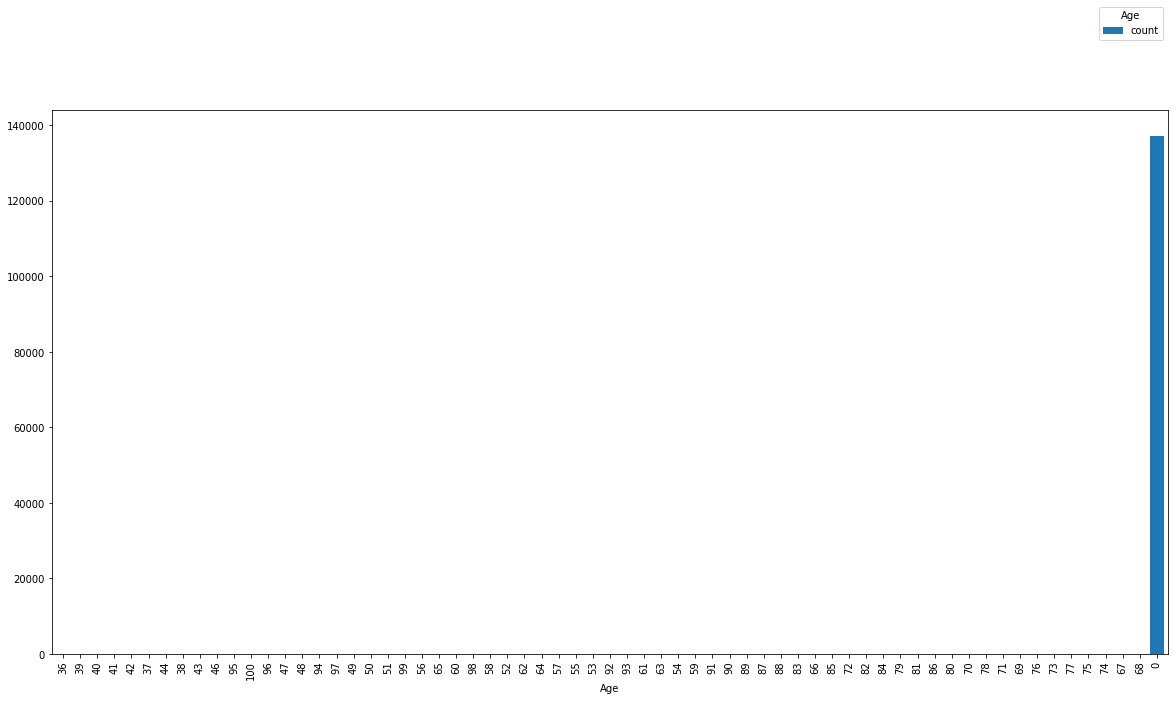

In [147]:
# crosstab bar plot in pandas: https://stackoverflow.com/a/43553569
ax = benef_age.plot(kind='bar', figsize= (20, 10), width = 0.8)
ax.legend(title = 'Age', bbox_to_anchor=(1, 1.2), loc='upper right')

##### Gender

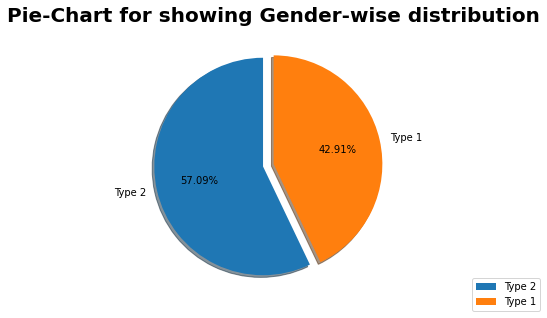

In [148]:
# cite: https://www.w3schools.com/python/matplotlib_pie_charts.asp, https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html  
# matplotlib.title: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.title.html 
plt.figure(figsize=(10,5))
plt.title('Pie-Chart for showing Gender-wise distribution', fontdict= {'fontsize': 20,
                                                                       'fontweight': 'bold'})
y = train_beneficiery['Gender'].value_counts()
explode = [0.1, 0]
plt.pie(y, labels= ['Type 2', 'Type 1'], explode = explode, autopct='%1.2f%%', shadow = True, startangle=90)
plt.legend(loc = 'upper right', bbox_to_anchor=(1.5, 0.1))
plt.show()

###### Age vs. Gender

In [149]:
# Previous Assignment: https://github.com/dataenthusiast092/Applied-AI-Assignments-Case-Studies/blob/master/Assignment-M2%20-%20Apply%20t%20SNE%20on%20Donors%20Choose%20dataset.ipynb
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='Gender', col3='total'):
  ind = np.arange(data.shape[0])
    
  plt.figure(figsize=(20,5))
  p1 = plt.bar(ind, data[col3].values)
  p2 = plt.bar(ind, data[col2].values)

  plt.ylabel('')
  plt.xlabel('Gender')
  plt.title('Male vs. Female')
  plt.xticks(ind, list(data[xtick].values))
  plt.legend((p1[0], p2[0]), ['Total', 'Average'])
  plt.show()

In [150]:
def univariate_barplots(data, col1, col2='Gender', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(data.groupby(col1)[col2].agg(total='count')).reset_index()['total']
    temp['Avg'] = pd.DataFrame(data.groupby(col1)[col2].agg(Avg='mean')).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
      temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))

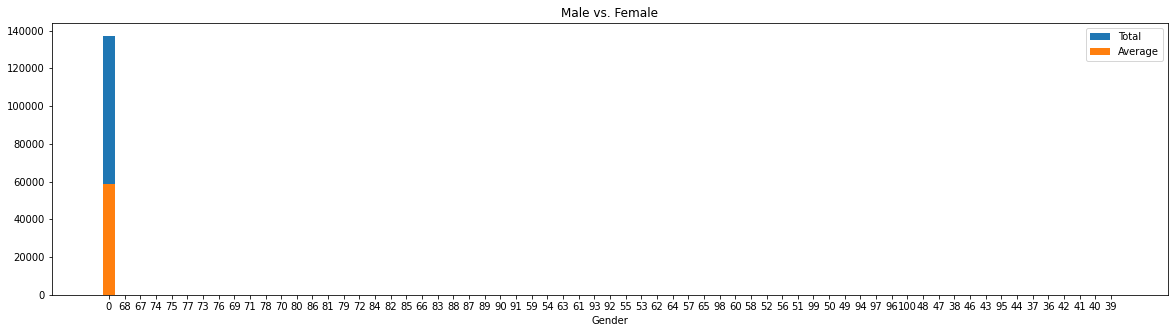

    Age  Gender   total       Avg
0     0   58851  137135  1.570854
32   68      44      79  1.443038
31   67      41      76  1.460526
38   74      28      67  1.582090
39   75      31      62  1.500000


In [151]:
univariate_barplots(train_beneficiery, 'Age', 'Gender', False)

##### Race

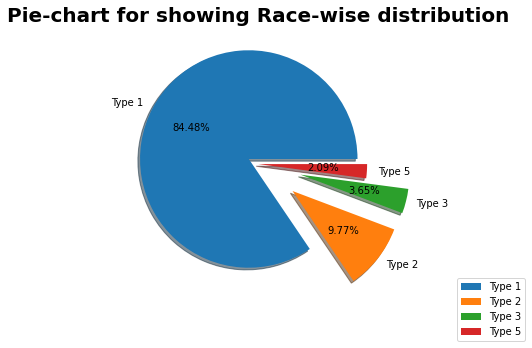

In [152]:
# cite: https://www.w3schools.com/python/matplotlib_pie_charts.asp, https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html  
# matplotlib.title: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.title.html 
plt.figure(figsize=(10,5))
plt.title('Pie-chart for showing Race-wise distribution', fontdict= {'fontsize': 20,
                                                                     'fontweight': 'bold'})
y = train_beneficiery['Race'].value_counts()
explode = [0.1, 0.4, 0.4, 0]
plt.pie(y, labels= ['Type 1', 'Type 2', 'Type 3', 'Type 5'], explode = explode, autopct='%1.2f%%', shadow = True, startangle=0)
plt.legend(loc = 'upper right', bbox_to_anchor=(1.5, 0.1))
plt.show()

##### State

In [153]:
# univariate analysis for categorical variables in python: https://adataanalyst.com/data-analysis-resources/visualise-categorical-variables-in-python/ 
benef_state = pd.crosstab(index = train_beneficiery['State'], columns = 'count')
benef_state= benef_state.sort_values(by='count').head(30)

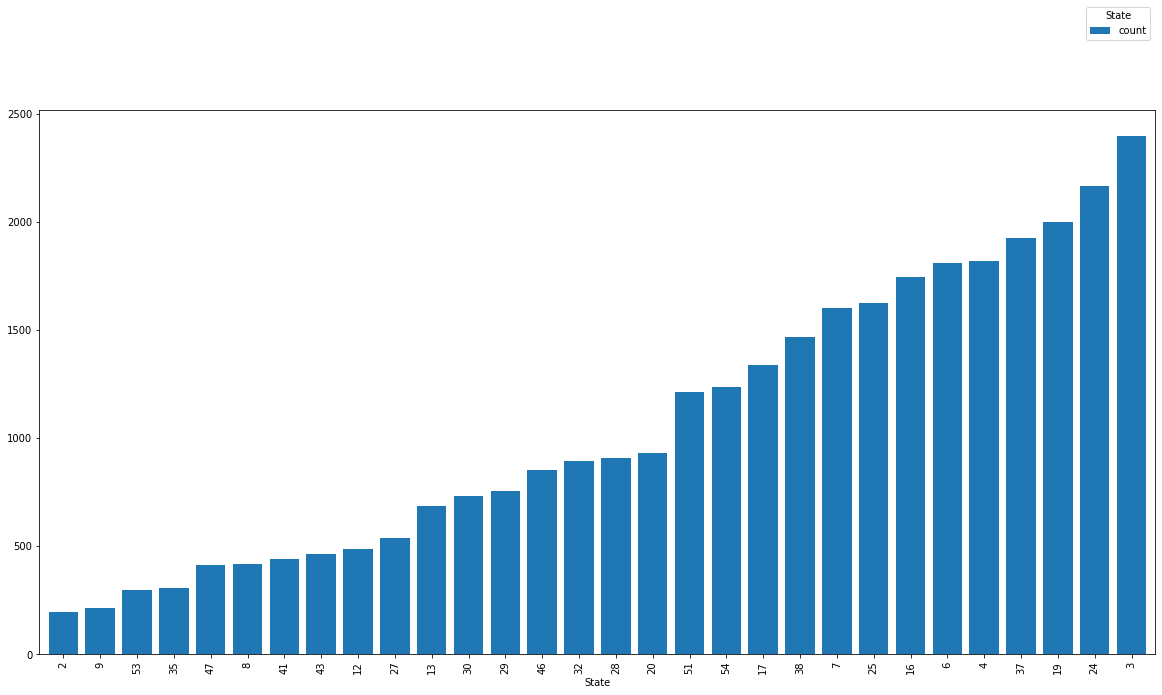

In [154]:
# crosstab bar plot in pandas: https://stackoverflow.com/a/43553569
ax = benef_state.plot(kind='bar', figsize= (20, 10), width = 0.8)
ax.legend(title = 'State', bbox_to_anchor=(1, 1.2), loc='upper right')


##### County

In [155]:
# univariate analysis for categorical variables in python: https://adataanalyst.com/data-analysis-resources/visualise-categorical-variables-in-python/ 
benef_county = pd.crosstab(index = train_beneficiery['County'], columns = 'count')
benef_county = benef_county.sort_values(by = 'count').head(100)




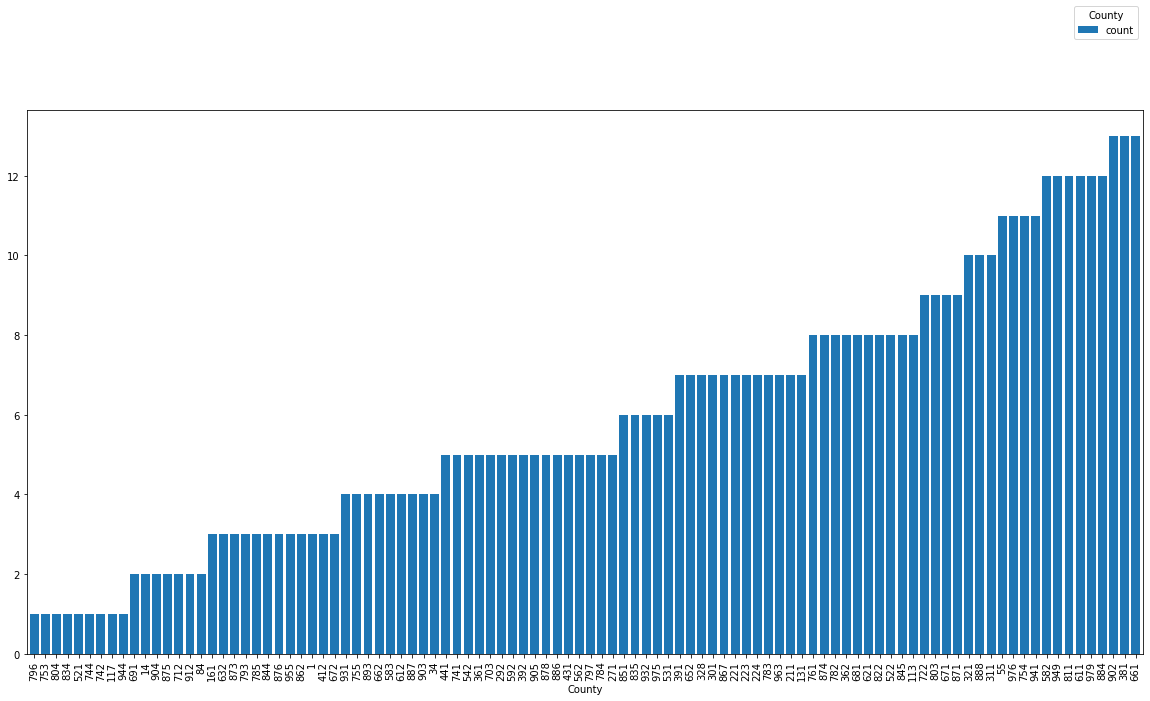

In [156]:
# crosstab bar plot in pandas: https://stackoverflow.com/a/43553569
ax = benef_county.plot(kind='bar', figsize= (20, 10), width = 0.8)
ax.legend(title = 'County', bbox_to_anchor=(1, 1.2), loc='upper right')

##### isDead

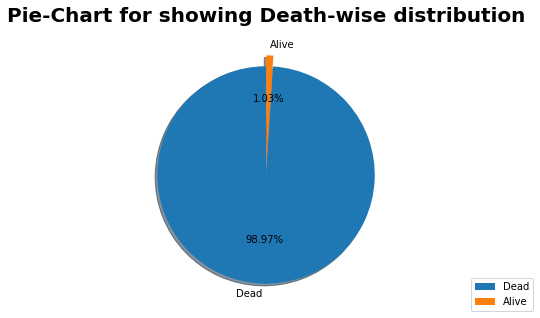

In [157]:
# cite: https://www.w3schools.com/python/matplotlib_pie_charts.asp, https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html  
# matplotlib.title: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.title.html 
plt.figure(figsize=(10,5))
plt.title('Pie-Chart for showing Death-wise distribution', fontdict= {'fontsize': 20,
                                                                       'fontweight': 'bold'})
y = train_beneficiery['isDead'].value_counts()
explode = [0.1, 0]
plt.pie(y, labels= ['Dead', 'Alive'], explode = explode, autopct='%1.2f%%', shadow = True, startangle=90)
plt.legend(loc = 'upper right', bbox_to_anchor=(1.5, 0.1))
plt.show()

##### Risk Score

In [158]:
# univariate analysis for categorical variables in python: https://adataanalyst.com/data-analysis-resources/visualise-categorical-variables-in-python/ 
benef_rs = pd.crosstab(index = train_beneficiery['Risk_Score'], columns = 'count')
benef_rs = benef_rs.sort_values(by = 'count').head(100)

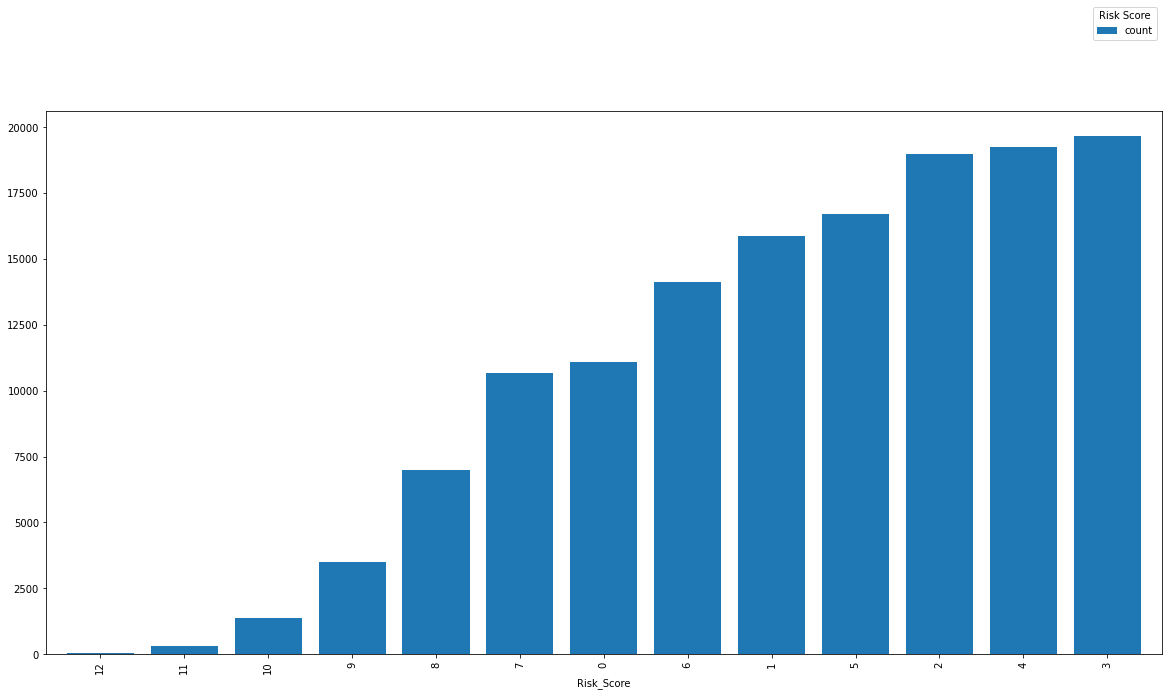

In [159]:
# crosstab bar plot in pandas: https://stackoverflow.com/a/43553569
ax = benef_rs.plot(kind='bar', figsize= (20, 10), width = 0.8)
ax.legend(title = 'Risk Score', bbox_to_anchor=(1, 1.2), loc='upper right')


###### Risk Score vs. Gender

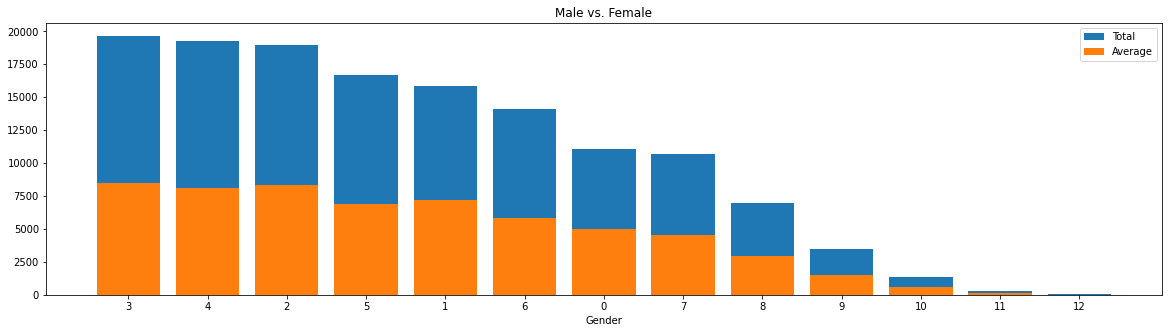

   Risk_Score  Gender  total       Avg
3           3    8465  19649  1.569189
4           4    8084  19257  1.580205
2           2    8345  18994  1.560651
5           5    6920  16716  1.586025
1           1    7179  15868  1.547580


In [160]:
univariate_barplots(train_beneficiery, 'Risk_Score', 'Gender', False)

##### Number of Months Part A Coverage


**What is meant by Part A Coverage?**

Medicare Part A (Hospital Insurance) are available to the individuals: 
- Age 65 or older  
- Disabled
- End-Stage Renal Disease (ESRD)

Most people get Part A for free, but some have to pay a premium for this coverage.

To be eligible for premium-free Part A, an individual must be entitled to receive Medicare based on their own earnings or those of a spouse, parent, or child. To receive premium-free Part A, the worker must have a specified number of quarters of coverage (QCs) and file an application for Social Security or Railroad Retirement Board (RRB) benefits. The exact number of QCs required is dependent on whether the person is filing for Part A on the basis of age, disability, or End Stage Renal Disease (ESRD). QCs are earned through payment of payroll taxes under the Federal Insurance Contributions Act (FICA) during the person's working years. Most individuals pay the full FICA tax so the QCs they earn can be used to meet the requirements for both monthly Social Security benefits and premium-free Part A.


In [161]:
# number of months part a coverage: https://www.cms.gov/Medicare/Eligibility-and-Enrollment/OrigMedicarePartABEligEnrol 
# univariate analysis for categorical variables in python: https://adataanalyst.com/data-analysis-resources/visualise-categorical-variables-in-python/ 
benef_part_a_cov = pd.crosstab(index = train_beneficiery['NoOfMonths_PartACov'], columns = 'count')
benef_part_a_cov = benef_part_a_cov.sort_values(by = 'count')
benef_part_a_cov

col_0,count
NoOfMonths_PartACov,
1,3
2,5
3,5
9,7
5,8
4,13
7,16
10,18
8,26


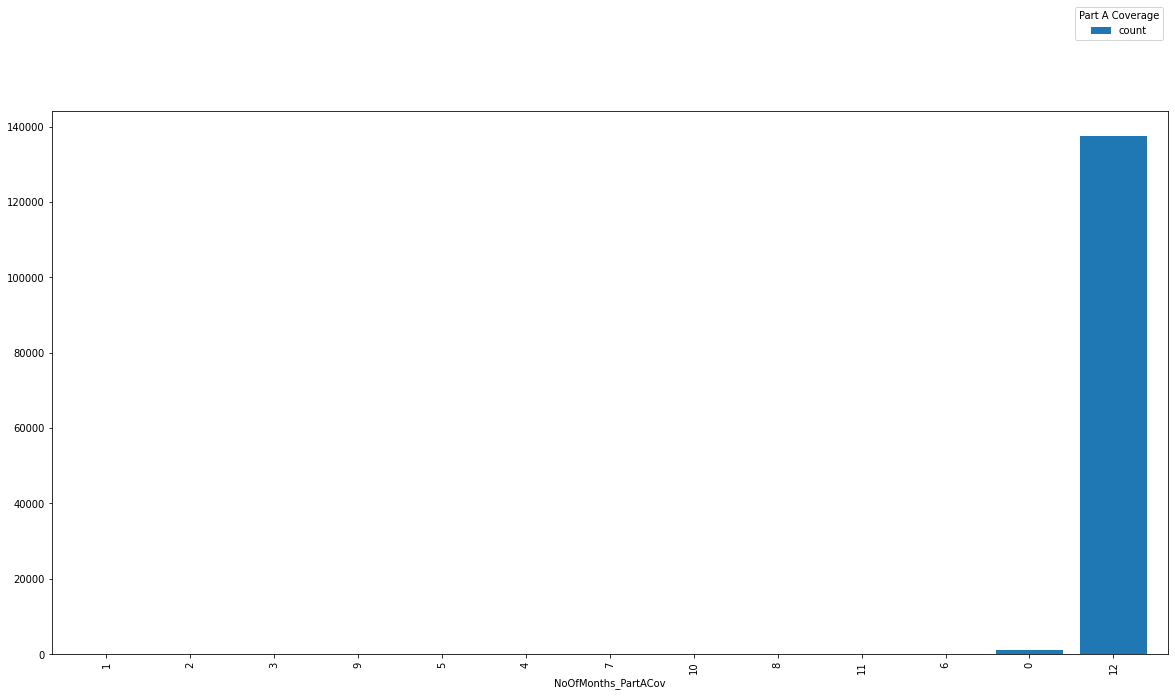

In [162]:
# crosstab bar plot in pandas: https://stackoverflow.com/a/43553569
ax = benef_part_a_cov.plot(kind='bar', figsize= (20, 10), width = 0.8)
ax.legend(title = 'Part A Coverage', bbox_to_anchor=(1, 1.2), loc='upper right')

In [163]:
print(round((train_beneficiery['NoOfMonths_PartACov'].value_counts()/train_beneficiery['NoOfMonths_PartACov'].shape[0])*100, 4), "%")

12    99.1577
0      0.7217
6      0.0274
11     0.0202
8      0.0188
10     0.0130
7      0.0115
4      0.0094
5      0.0058
9      0.0051
3      0.0036
2      0.0036
1      0.0022
Name: NoOfMonths_PartACov, dtype: float64 %


##### Number of Months Part B Coverage


**What is meant by Part B Coverage or Medicare(Medical Insurance)?**

The eligibility rules for Part B depend on whether a person is eligible for premium-free Part A or whether the individual has to pay a premium for Part A coverage.

Individuals who are eligible for premium-free Part A are also eligible for enroll in Part B once they are entitled to Part A.  Enrollment in Part B can only happen at certain times.

Individuals who must pay a premium for Part A must meet the following requirements to enroll in Part B:

- Be age 65 or older;
- Be a U.S. resident; AND
- Be either a U.S. citizen, OR
- Be an alien who has been lawfully admitted for permanent residence and has been residing in the United States for 5 continuous years prior to the month of filing an application for Medicare.



In [164]:
# number of months part b coverage: https://www.cms.gov/Medicare/Eligibility-and-Enrollment/OrigMedicarePartABEligEnrol 
# number of months part a coverage: https://www.cms.gov/Medicare/Eligibility-and-Enrollment/OrigMedicarePartABEligEnrol 
# univariate analysis for categorical variables in python: https://adataanalyst.com/data-analysis-resources/visualise-categorical-variables-in-python/ 
benef_part_b_cov = pd.crosstab(index = train_beneficiery['NoOfMonths_PartBCov'], columns = 'count')
benef_part_b_cov = benef_part_b_cov.sort_values(by = 'count')

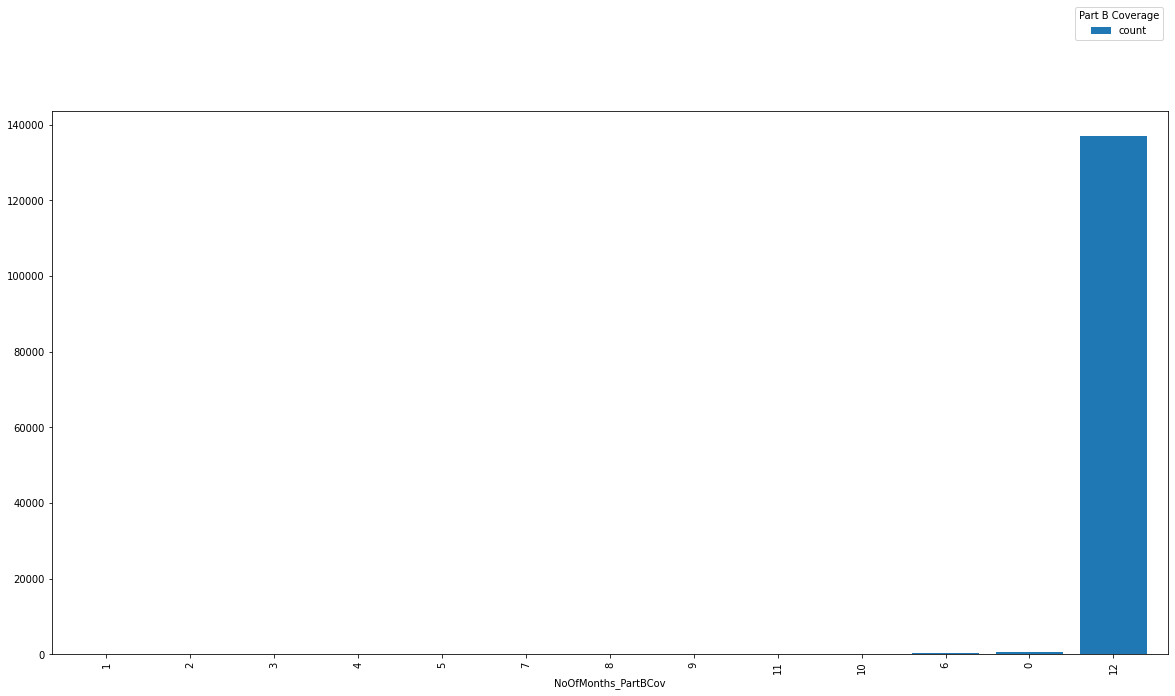

In [165]:
# crosstab bar plot in pandas: https://stackoverflow.com/a/43553569
ax = benef_part_b_cov.plot(kind='bar', figsize= (20, 10), width = 0.8)
ax.legend(title = 'Part B Coverage', bbox_to_anchor=(1, 1.2), loc='upper right')

In [166]:
print(round((train_beneficiery['NoOfMonths_PartBCov'].value_counts()/train_beneficiery['NoOfMonths_PartBCov'].shape[0])*100, 4), "%")

12    98.8063
0      0.4872
6      0.2035
10     0.1083
11     0.1032
9      0.0881
8      0.0512
7      0.0455
5      0.0361
4      0.0253
3      0.0195
2      0.0137
1      0.0123
Name: NoOfMonths_PartBCov, dtype: float64 %


##### Annual Deductible for Inpatient

In [167]:
# univariate analysis for categorical variables in python: https://adataanalyst.com/data-analysis-resources/visualise-categorical-variables-in-python/ 
benef_deductible = pd.crosstab(index = train_beneficiery['IPAnnualDeductibleAmt'].value_counts(), columns = 'count')
benef_deductible = benef_deductible.sort_values(by = 'count').head(75)

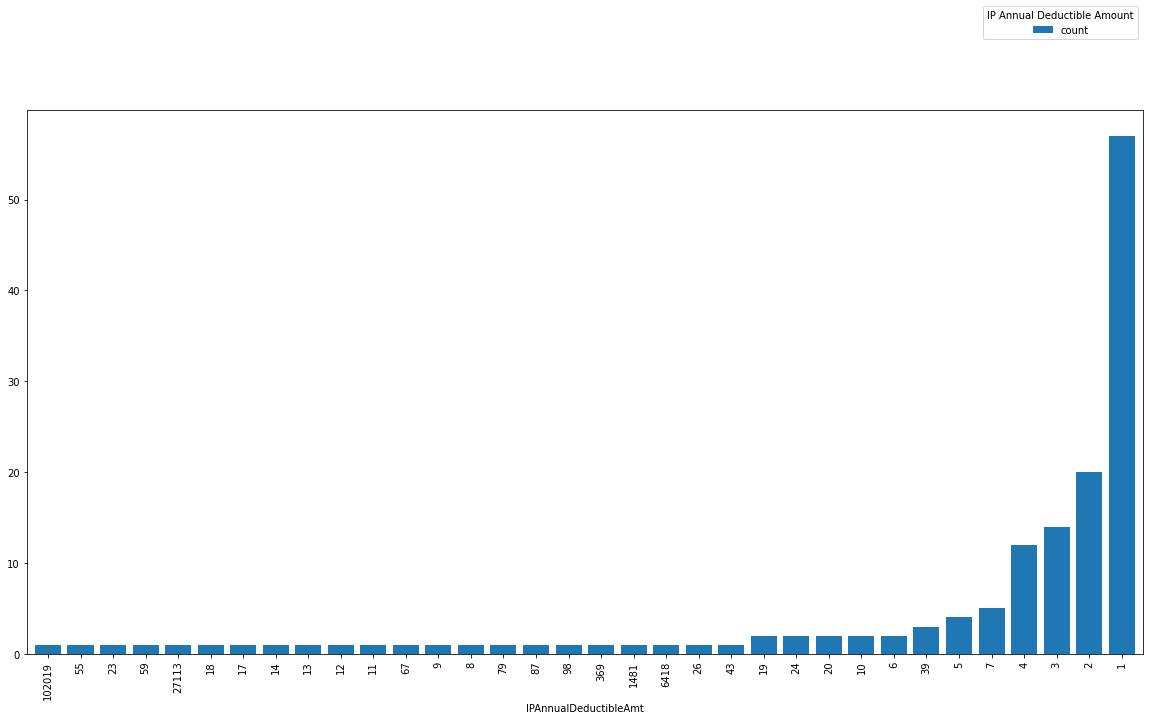

In [168]:
# crosstab bar plot in pandas: https://stackoverflow.com/a/43553569
ax = benef_deductible.plot(kind='bar', figsize= (20, 10), width = 0.8)
ax.legend(title = 'IP Annual Deductible Amount', bbox_to_anchor=(1, 1.2), loc='upper right')


##### Annual Reimbursement for Inpatient

In [169]:
# univariate analysis for categorical variables in python: https://adataanalyst.com/data-analysis-resources/visualise-categorical-variables-in-python/ 
benef_reimb = pd.crosstab(index = train_beneficiery['IPAnnualReimbursementAmt'].value_counts(), columns = 'count')
benef_reimb = benef_reimb.sort_values(by = 'count')

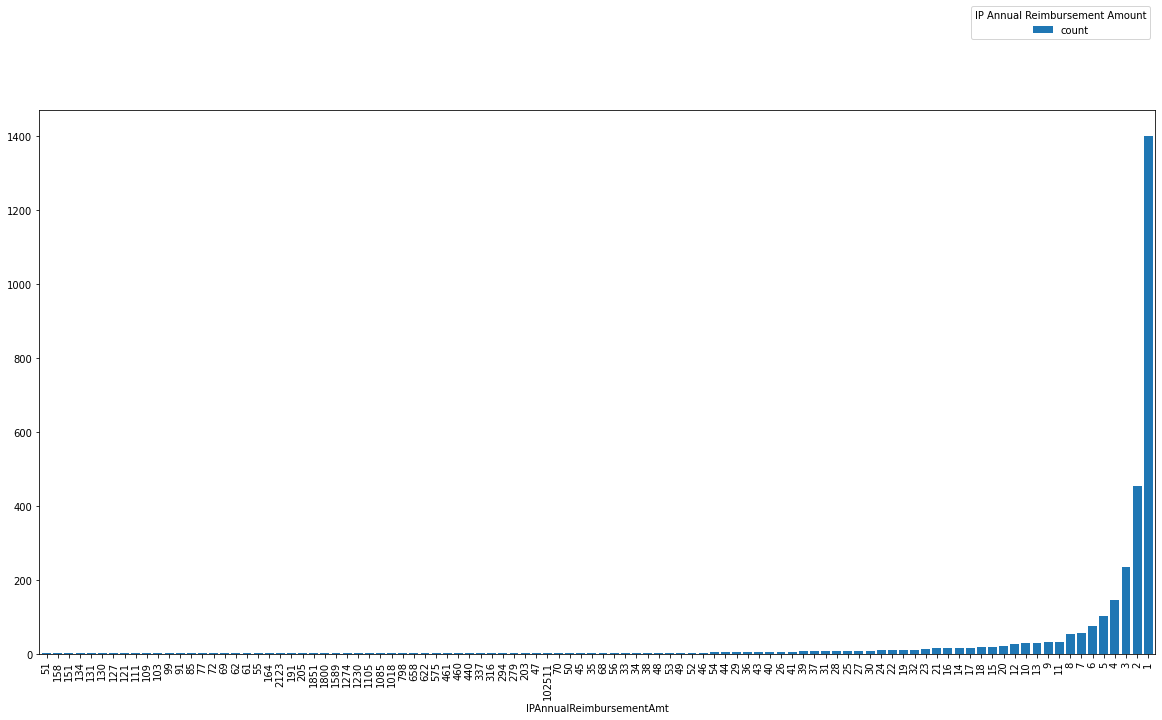

In [170]:
# crosstab bar plot in pandas: https://stackoverflow.com/a/43553569
ax = benef_reimb.plot(kind='bar', figsize= (20, 10), width = 0.8)
ax.legend(title = 'IP Annual Reimbursement Amount', bbox_to_anchor=(1, 1.2), loc='upper right')


##### Annual Deductible for Outpatient

In [171]:
train_beneficiery['OPAnnualReimbursementAmt'].value_counts()

0        4205
100      3916
200      3153
60       2694
300      2280
         ... 
12130       1
22470       1
16030       1
19390       1
38650       1
Name: OPAnnualReimbursementAmt, Length: 2078, dtype: int64

In [172]:
# univariate analysis for categorical variables in python: https://adataanalyst.com/data-analysis-resources/visualise-categorical-variables-in-python/ 
benef_deductible2 = pd.crosstab(index = train_beneficiery['OPAnnualDeductibleAmt'].value_counts(), columns = 'count')
benef_deductible2 = benef_deductible2.sort_values(by = 'count')

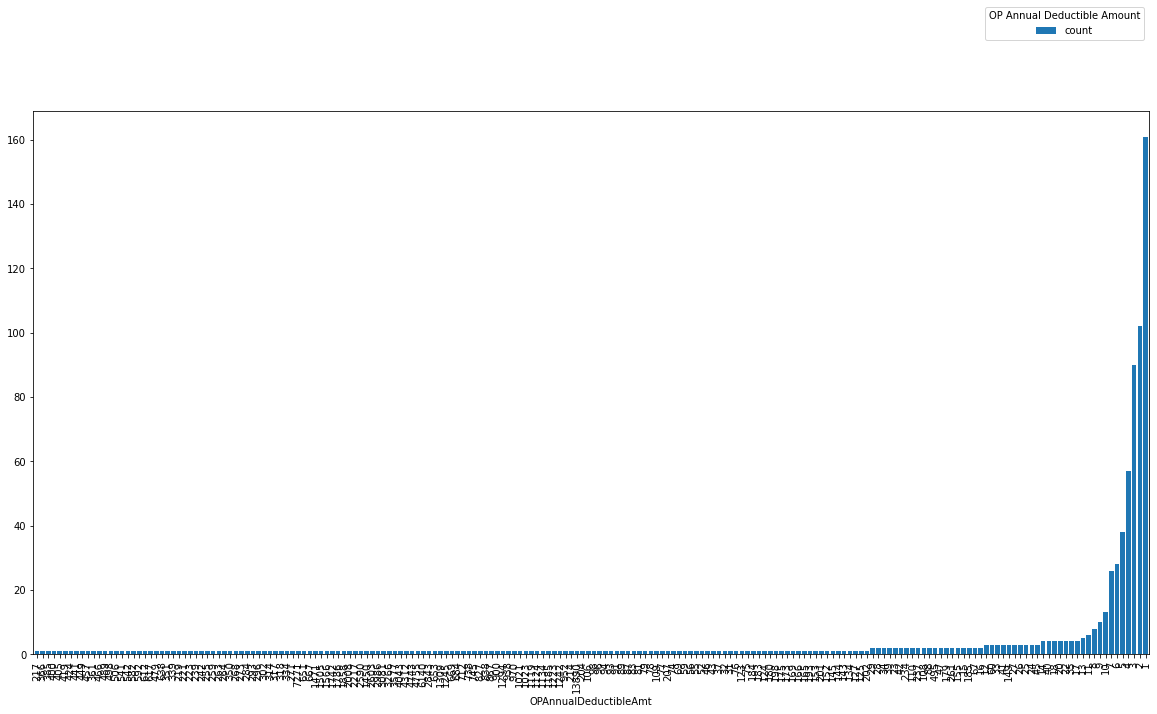

In [173]:
# crosstab bar plot in pandas: https://stackoverflow.com/a/43553569
ax = benef_deductible2.plot(kind='bar', figsize= (20, 10), width = 0.8)
ax.legend(title = 'OP Annual Deductible Amount', bbox_to_anchor=(1, 1.2), loc='upper right')


##### Annual Reimbursement for Outpatient

In [174]:
# univariate analysis for categorical variables in python: https://adataanalyst.com/data-analysis-resources/visualise-categorical-variables-in-python/ 
benef_reimb2 = pd.crosstab(index = train_beneficiery['OPAnnualReimbursementAmt'].value_counts().head(200), columns = 'count')
benef_reimb2 = benef_reimb2.sort_values(by = 'count')

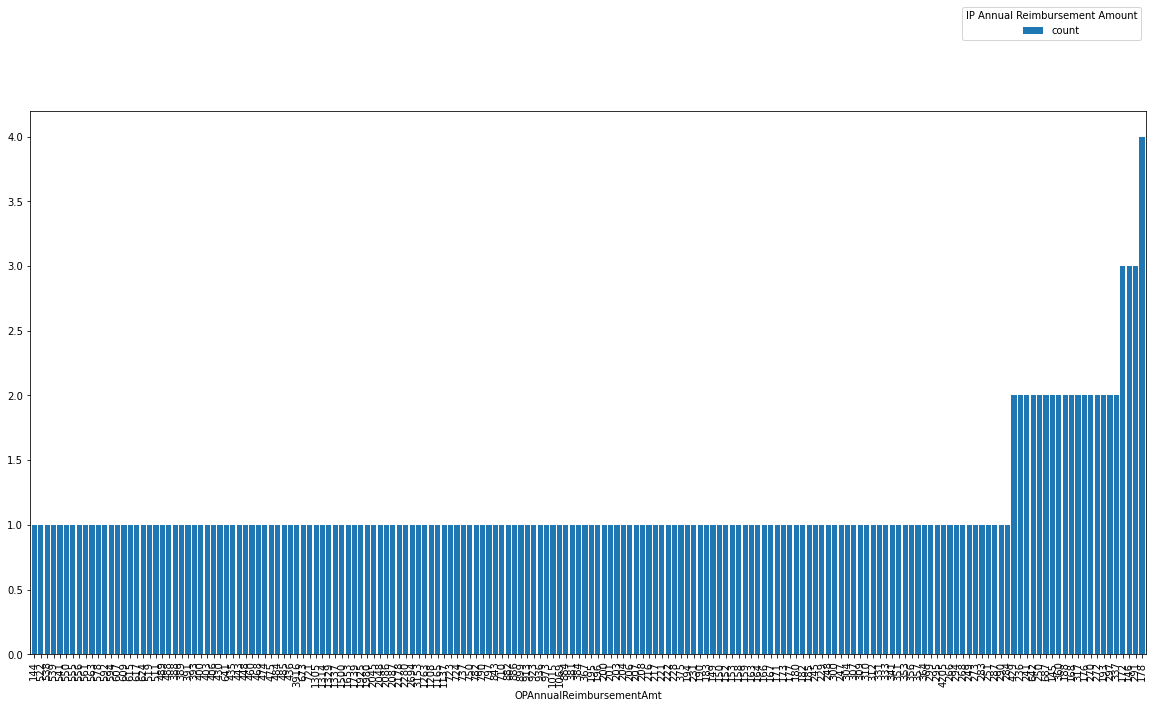

In [175]:
# crosstab bar plot in pandas: https://stackoverflow.com/a/43553569
ax = benef_reimb2.plot(kind='bar', figsize= (20, 10), width = 0.8)
ax.legend(title = 'IP Annual Reimbursement Amount', bbox_to_anchor=(1, 1.2), loc='upper right')


#### Inpatient Data

##### Claim Duration

In [176]:
# univariate analysis for categorical variables in python: https://adataanalyst.com/data-analysis-resources/visualise-categorical-variables-in-python/ 
claim_duration_inpatient = pd.crosstab(index = train_inpatient['Claim_duration_inpatient'].value_counts(), columns = 'count')
claim_duration_inpatient = claim_duration_inpatient.sort_values(by = 'count')

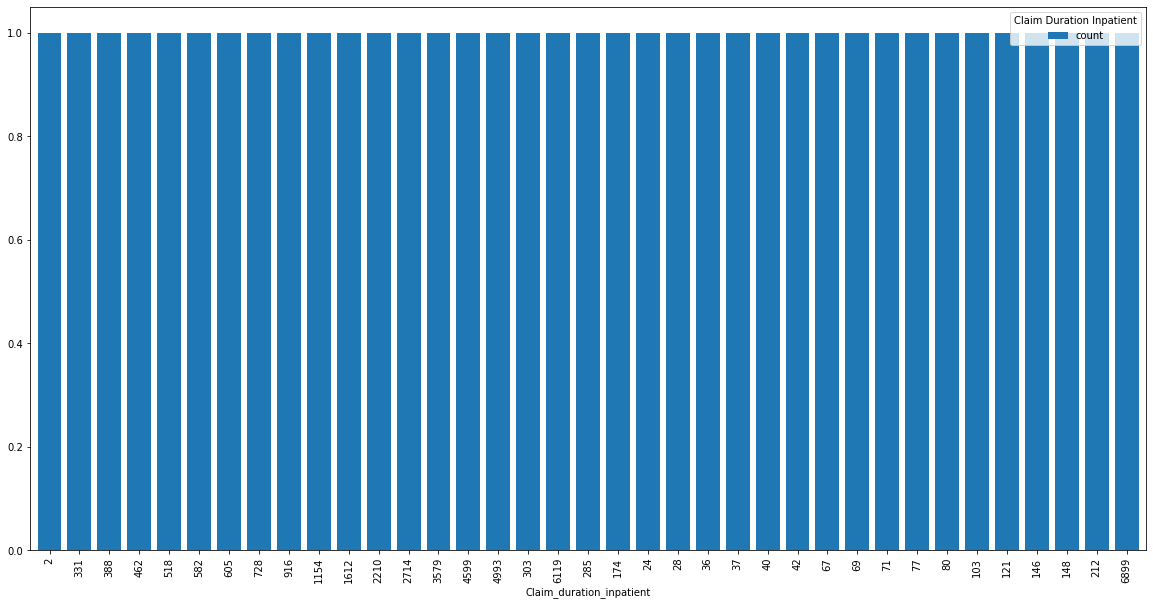

In [177]:
# crosstab bar plot in pandas: https://stackoverflow.com/a/43553569
ax = claim_duration_inpatient.plot(kind='bar', figsize= (20, 10), width = 0.8)
ax.legend(title = 'Claim Duration Inpatient', loc='upper right')


##### Physicians

In [178]:
train_inpatient['Physicians_inpatient'].value_counts()

AP_OPP        20413
AP            15260
AP_OPP_OTP     3411
AP_OTP         1278
None            106
OPP               5
OPP_OTP           1
Name: Physicians_inpatient, dtype: int64

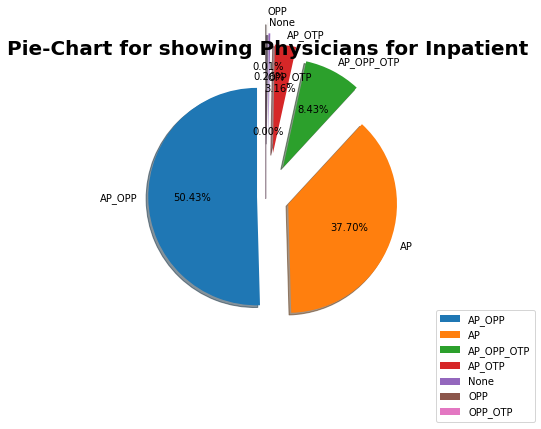

In [179]:
# cite: https://www.w3schools.com/python/matplotlib_pie_charts.asp, https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html  
# matplotlib.title: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.title.html 
plt.figure(figsize=(10,5))
plt.title('Pie-Chart for showing Physicians for Inpatient', fontdict= {'fontsize': 20,
                                                                       'fontweight': 'bold'})
y = train_inpatient['Physicians_inpatient'].value_counts()
explode = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0]
plt.pie(y,labels = ['AP_OPP', 'AP', 'AP_OPP_OTP', 'AP_OTP', 'None', 'OPP', 'OPP_OTP'],explode=explode, autopct='%1.2f%%', shadow = True, startangle=90)
plt.legend(loc = 'upper right', bbox_to_anchor=(1.5, 0.1))
plt.show()

##### Hospital Stay Duration

In [180]:
train_inpatient['Hospital_Stay_Duration'].value_counts()

3     6902
2     6117
4     4994
1     4591
5     3579
6     2719
7     2206
8     1613
9     1151
10     917
11     726
0      605
12     582
13     518
14     462
15     387
35     337
16     306
17     286
18     212
19     174
21     147
20     146
22     121
23     103
24      80
27      77
28      72
25      68
26      68
29      42
32      40
33      38
30      36
34      28
31      24
Name: Hospital_Stay_Duration, dtype: int64

In [181]:
# univariate analysis for categorical variables in python: https://adataanalyst.com/data-analysis-resources/visualise-categorical-variables-in-python/ 
hospital_stay_duration_inpatient = pd.crosstab(index = train_inpatient['Hospital_Stay_Duration'].value_counts(), columns = 'count')
hospital_stay_duration_inpatient = hospital_stay_duration_inpatient.sort_values(by = 'count')

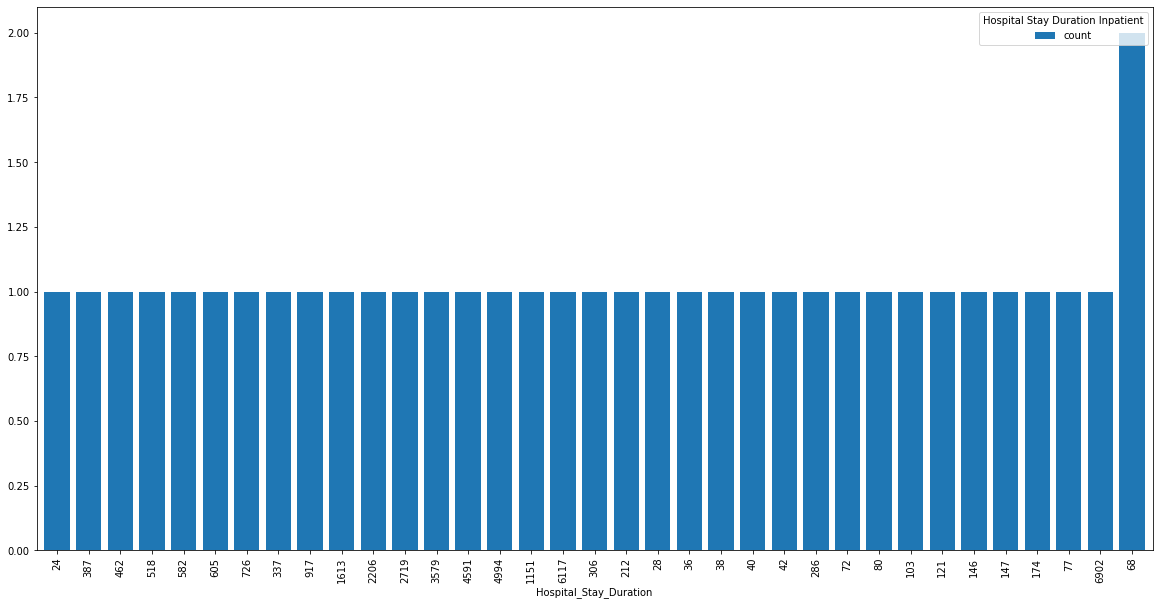

In [182]:
# crosstab bar plot in pandas: https://stackoverflow.com/a/43553569
ax = hospital_stay_duration_inpatient.plot(kind='bar', figsize= (20, 10), width = 0.8)
ax.legend(title = 'Hospital Stay Duration Inpatient', loc='upper right')


##### Diagnosis Group Codes

In [183]:
train_inpatient['DiagnosisGroupCode'].value_counts()

Circulatory                9121
Respiratory                5658
Musculoskeletal            4800
Digestive                  4068
Nervous-System             3012
Nephrology                 2526
Pathology                  1715
Endocrine                  1454
Health_Logistics           1440
Psychology                 1410
Hepatobiliary              1088
Skin_Tissue                 964
Haematology                 539
Toxicology                  436
Gynaecology                 338
ENT                         301
Andrology                   274
Onco-Pathology              254
Psychological_Addiction     253
MDC                         244
Pre-MDC                     166
000                         134
OTH                         113
Trauma                       44
Obstetrics                   42
HIV-AIDS                     40
Eye                          27
Dermatology                  13
Name: DiagnosisGroupCode, dtype: int64

In [184]:
# univariate analysis for categorical variables in python: https://adataanalyst.com/data-analysis-resources/visualise-categorical-variables-in-python/ 
diagnosisgroupcodes = pd.crosstab(index = train_inpatient['DiagnosisGroupCode'].value_counts(), columns = 'count')
diagnosisgroupcodes = diagnosisgroupcodes.sort_values(by = 'count')

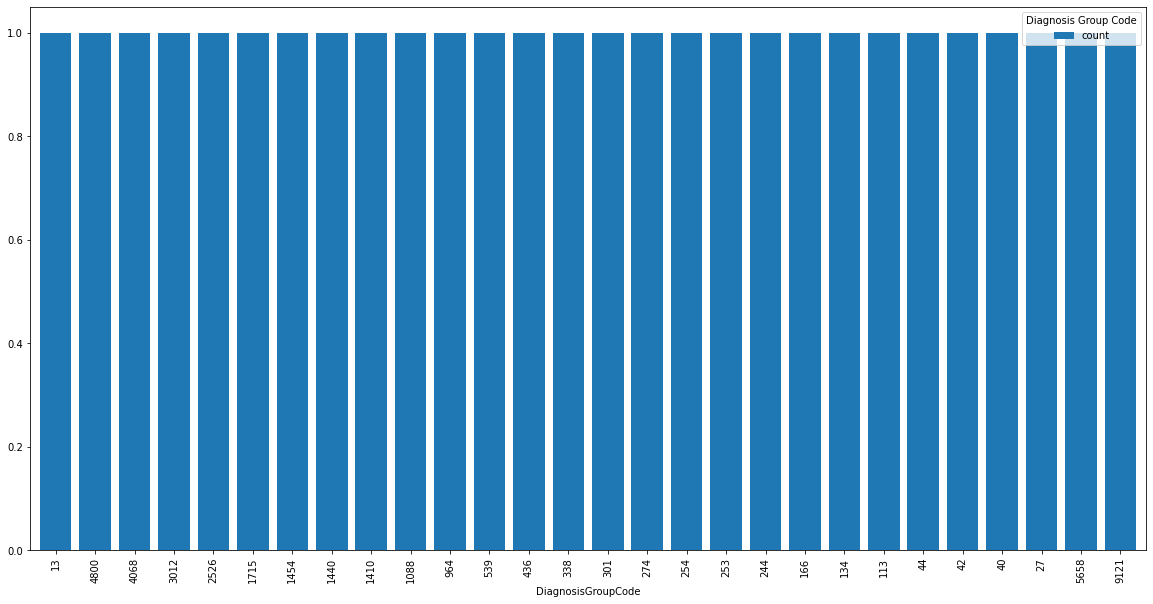

In [185]:
# crosstab bar plot in pandas: https://stackoverflow.com/a/43553569
ax = diagnosisgroupcodes.plot(kind='bar', figsize= (20, 10), width = 0.8)
ax.legend(title = 'Diagnosis Group Code', loc='upper right')


#### Outpatient Data

##### Claim Duration

In [186]:
train_outpatient['Claim_duration_outpatient'].value_counts()

0     453348
20     24312
1      11960
2       4366
14      2735
3       2597
7       2564
4       2238
5       1511
9       1378
6       1306
8       1189
16      1136
10       982
15       975
11       953
13       947
12       903
17       808
18       800
19       727
23         1
21         1
Name: Claim_duration_outpatient, dtype: int64

In [187]:
# univariate analysis for categorical variables in python: https://adataanalyst.com/data-analysis-resources/visualise-categorical-variables-in-python/ 
claim_duration_outpatient = pd.crosstab(index = train_outpatient['Claim_duration_outpatient'].value_counts(), columns = 'count')
claim_duration_outpatient = claim_duration_outpatient.sort_values(by = 'count')

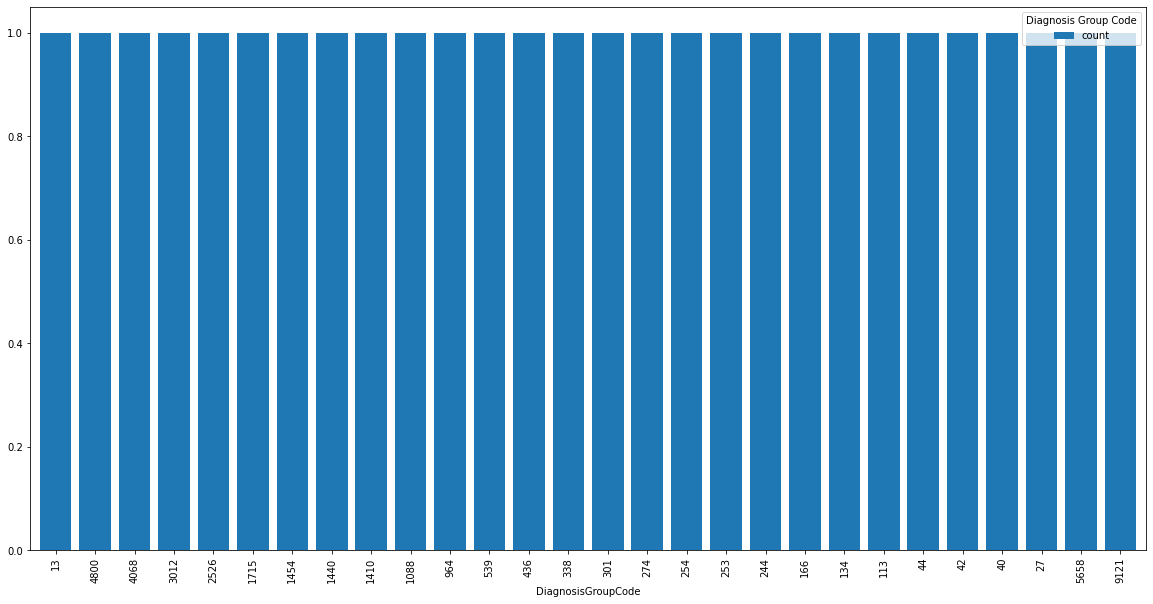

In [188]:
# crosstab bar plot in pandas: https://stackoverflow.com/a/43553569
ax = diagnosisgroupcodes.plot(kind='bar', figsize= (20, 10), width = 0.8)
ax.legend(title = 'Diagnosis Group Code', loc='upper right')


##### Physicians

In [189]:
train_outpatient['Physicians_outpatient'].value_counts()

AP            271342
AP_OTP        154390
AP_OPP         49965
AP_OPP_OTP     40644
None            1377
OTP               11
OPP                7
OPP_OTP            1
Name: Physicians_outpatient, dtype: int64

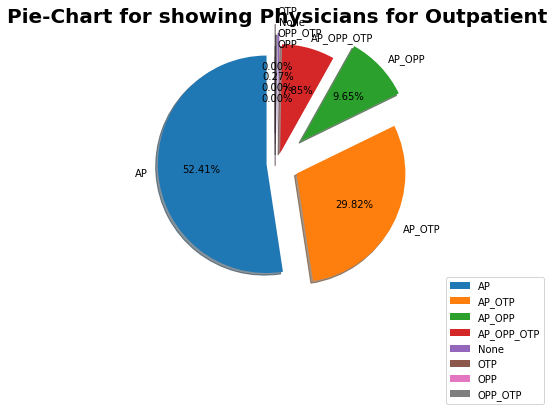

In [190]:
# cite: https://www.w3schools.com/python/matplotlib_pie_charts.asp, https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html  
# matplotlib.title: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.title.html 
plt.figure(figsize=(10,5))
plt.title('Pie-Chart for showing Physicians for Outpatient', fontdict= {'fontsize': 20,
                                                                       'fontweight': 'bold'})
y = train_outpatient['Physicians_outpatient'].value_counts()
explode = [0.1, 0.2, 0.3, 0.1, 0.2, 0.3, 0, 0.1]
plt.pie(y,labels = ['AP', 'AP_OTP', 'AP_OPP', 'AP_OPP_OTP', 'None', 'OTP', 'OPP', 'OPP_OTP'],explode=explode, autopct='%1.2f%%', shadow = True, startangle=90)
plt.legend(loc = 'upper right', bbox_to_anchor=(1.5, 0.1))
plt.show()

## Final Stage after Pre-processing

### Merging Datasets which have ClaimID and Provider as Common

In [191]:
train_inpatient.columns

Index(['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed',
       'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Claim_duration_inpatient',
       'Physicians_inpatient', 'Hospital_Stay_Duration'],
      dtype='object')

In [192]:
train_outpatient.columns

Index(['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'DeductibleAmtPaid', 'ClmAdmitDiagnosisCode',
       'Claim_duration_outpatient', 'Physicians_outpatient'],
      dtype='object')

In [193]:
train_inpatient.rename({'Physicians_inpatient': 'Physicians'}, axis='columns', inplace=True)

In [194]:
train_inpatient.rename({'Claim_duration_inpatient': 'Claim_duration'}, axis='columns', inplace=True)

In [195]:
train_outpatient.rename({'Physicians_outpatient': 'Physicians'}, axis='columns', inplace=True)

In [196]:
train_outpatient.rename({'Claim_duration_outpatient': 'Claim_duration'}, axis='columns', inplace=True)

In [197]:
# merging 3 datasets in pandas: https://stackoverflow.com/a/41815118
claim_ID_ds = train_inpatient.merge(train_outpatient, on=['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed', 'Physicians', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6', 'Claim_duration'], how='outer')
claim_ID_ds.shape

(558211, 26)

In [198]:
claim_ID_ds.columns

Index(['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed',
       'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Claim_duration', 'Physicians',
       'Hospital_Stay_Duration'],
      dtype='object')

## Merging Datasets which have Beneficiery ID as Common

In [199]:
# merging 3 datasets in pandas: https://stackoverflow.com/a/41815118
ds = train_beneficiery.merge(claim_ID_ds, on='BeneID', how='outer').merge(train_target, on = 'Provider')
ds.shape

(558211, 40)

In [200]:
ds.columns

Index(['BeneID', 'Gender', 'Race', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'Age', 'isDead', 'Risk_Score', 'ClaimID',
       'Provider', 'InscClaimAmtReimbursed', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
       'Claim_duration', 'Physicians', 'Hospital_Stay_Duration',
       'PotentialFraud'],
      dtype='object')

In [201]:
ds.shape

(558211, 40)

In [202]:
ds.isnull().sum()

BeneID                           0
Gender                           0
Race                             0
State                            0
County                           0
NoOfMonths_PartACov              0
NoOfMonths_PartBCov              0
IPAnnualReimbursementAmt         0
IPAnnualDeductibleAmt            0
OPAnnualReimbursementAmt         0
OPAnnualDeductibleAmt            0
Age                              0
isDead                           0
Risk_Score                       0
ClaimID                          0
Provider                         0
InscClaimAmtReimbursed           0
ClmAdmitDiagnosisCode       412312
DeductibleAmtPaid              899
DiagnosisGroupCode          517737
ClmDiagnosisCode_1           10453
ClmDiagnosisCode_2          195606
ClmDiagnosisCode_3          315156
ClmDiagnosisCode_4          393675
ClmDiagnosisCode_5          446287
ClmDiagnosisCode_6          473819
ClmDiagnosisCode_7          492034
ClmDiagnosisCode_8          504767
ClmDiagnosisCode_9  

### Converting to csv file

In [203]:
ds.to_csv('Healthcare_Provider_Fraud_Detection_Analysis.csv')

In [204]:
ds['PotentialFraud'] = ds['PotentialFraud'].replace('Yes', 1)
ds['PotentialFraud'] = ds['PotentialFraud'].replace('No', 0)

## Bivariate Analysis

### Total Claims categorized as Non/Frauds

In [205]:
ds['PotentialFraud'].value_counts()

0    345415
1    212796
Name: PotentialFraud, dtype: int64

**CONCLUSION**▶There are total 345K Non-Fraud and 212K Fraud cases. Certainly an imbalance dataset.

### Relation between Gender, Age, Race, State, County and Disease 

#### Category-wise percentage of Age-groups 

In [206]:
temp1 = ds['Age'].fillna(0.0).astype(int)
temp1 = (temp1/10).round().astype(int)
print(((temp1.value_counts())/ds.shape[0]*100).round(2),'%')

0     99.26
8      0.27
7      0.25
9      0.10
6      0.06
5      0.03
10     0.02
4      0.01
Name: Age, dtype: float64 %


####**▶ Conclusion** 

Most of the patients are no more, which is approx. 99%.

#### Scatterplot of Age vs. State

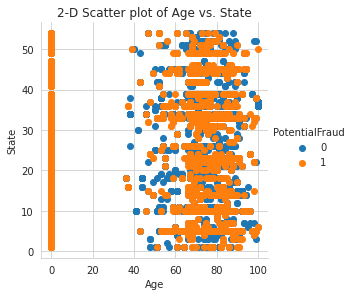

In [207]:
sns.set_style('whitegrid')
sns.FacetGrid(ds, hue = 'PotentialFraud', size=4).map(plt.scatter, 'Age', 'State').add_legend()
plt.title('2-D Scatter plot of Age vs. State')
plt.xlabel('Age')
plt.ylabel('State')
plt.show()

####**▶ Conclusion** 

Maximum claims which are Frauds(orange) are of the patients whose age is not mentioned in their details.

Potential Fraud claims for the benenficieries are spread over all the states and so are the non fraud claims. Whereas, most claims are of the patients of age between 40-100. None of the frauds are for the age below 35.

#### PDF of Risk_Score

In [208]:
ds['Risk_Score'].value_counts()

4     77873
5     76464
6     72890
3     69024
7     61611
2     58189
8     44199
1     40268
9     23994
0     21441
10     9754
11     2248
12      256
Name: Risk_Score, dtype: int64

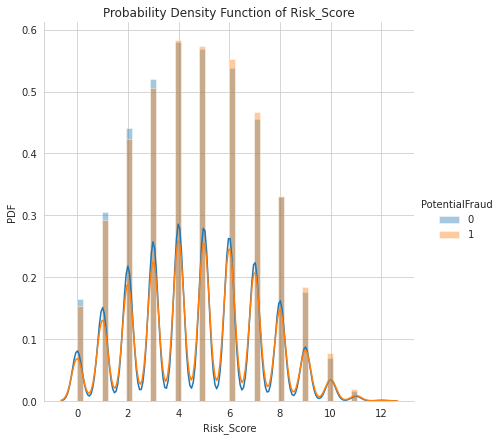

In [209]:
sns.FacetGrid(ds, hue='PotentialFraud', size=6).map(sns.distplot, 'Risk_Score').add_legend()
plt.grid(True)
plt.title('Probability Density Function of Risk_Score')
plt.xlabel('Risk_Score')
plt.ylabel('PDF')
plt.show()

####**▶ Conclusion**

50-60% Beneficieries have their Risk Score between 3-6 and out of those 3 Risk Score has maximum Non-Frauds claims vs. 4,5,6 Risk Score have maximum Fraud Claims.

40-50% Beneficieries have their Risk Score as 2 & 7. 2 has maximum non-fraud claims whereas, 7 has maximum fraud claims.

30-40% Beneficieries have their Risk Score as 8 and their claims are mostly fraud.

20-30% Beneficieries have their Risk Score as 1 and are non frauds claims.

10-20% Beneficieries have their Risk Score as 0 & 9 and 0 Risk Score have non-fraud claims whereas 9 have fraud claims.

0-10% Beneficieries have their Risk Score as 10, 11 & 12 are Fraud claims.

With this we come to the conclusion that Beneficieries whose Risk Score is 4 or more have Fraud Claims.

#### Boxplot of Physicians

In [210]:
ds['Physicians'].value_counts()

AP            286602
AP_OTP        155668
AP_OPP         70378
AP_OPP_OTP     44055
None            1483
OPP               12
OTP               11
OPP_OTP            2
Name: Physicians, dtype: int64

Here,

1. AP = Attending Physician
2. OPP - Operating Physician
3. OTP = Other Physician
4. AP_OPP = Attendin & operating Physician both
5. OPP_OTP = Operating Physician both
6. AP_OTP = Attending & Other Physician
7. AP_OPP_OTP = Attending & Operating & Other Physician
8. None = None of the categories.



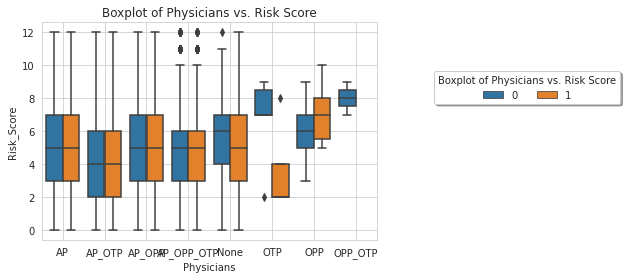

In [211]:
sns.boxplot(x='Physicians', y='Risk_Score', data=ds, hue='PotentialFraud')
plt.title('Boxplot of Physicians vs. Risk Score')
plt.xlabel('Physicians')
plt.ylabel('Risk_Score')
plt.legend(title='Boxplot of Physicians vs. Risk Score', loc='upper center', bbox_to_anchor=(1.45, 0.8),  shadow=True, ncol=2)
plt.grid(True)
plt.show()

####**▶ Conclusion**

Outlier values are present for categories .. AP_OPP_OTP for both fraud & non-fraud claim cases, None category has outlier in non-fraud claims and OTP has outliers in both fraud & non-fraud claims.

AP & AP_OPP have almost similar Risk_Score for both Fraud & Non-Fraud claims which is 3-7.

AP_OTP have almost similar Risk_Score for both Fraud & Non-Fraud claims which is 2-6.

AP_OPP_OTP have almost similar Risk_Score for both Fraud & Non-Fraud claims which is 3-6.

None category of Physicians have Risk Score for Fraud claim cases. This no. is similar to Risk Score of AP_OPP & AP, which is 3-7. Also, None category has Risk Score for Non-Fraud claims cases as 4-7.

OTP & OPP_OTP have Risk_Score between 7-9 and are Non-Fraud claims.

OPP have Risk_Score between 5-7 and are Non-Fraud claims.

OTP & OPP have Risk-Score between 2-4 & 5-8, respectively. They are Fraud claims.




#### Boxplot of isDead vs. Risk_Score

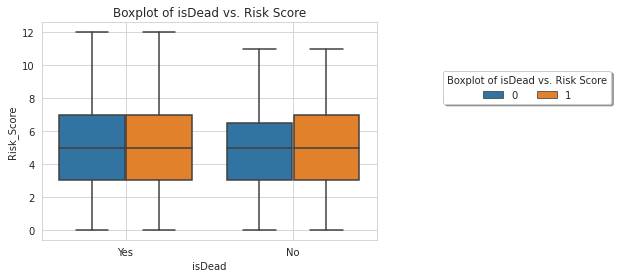

In [212]:
sns.boxplot(x='isDead', y='Risk_Score', data=ds, hue='PotentialFraud')
plt.title('Boxplot of isDead vs. Risk Score')
plt.xlabel('isDead')
plt.ylabel('Risk_Score')
plt.legend(title='Boxplot of isDead vs. Risk Score', loc='upper center', bbox_to_anchor=(1.45, 0.8),  shadow=True, ncol=2)
plt.grid(True)
plt.show()

####**▶ Conclusion**

Beneficieries who have died have their Risk_Score between 3-7 have both their Claims as Frauds and Non-Frauds.

Whereas beneficieries who survive have their Risk_Score between 3-to-slighlty-above-6 & 3-7 have their claims as Non-Frauds & Frauds, respectively.

So, there is not much difference to understand Risk_Score who have died or survived with PotentialFraud

#### Provider vs. Claim_duration

No handles with labels found to put in legend.


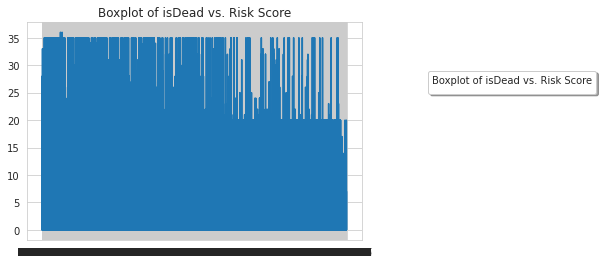

In [213]:
plt.plot(ds['Provider'], ds['Claim_duration'])
plt.title('Boxplot of isDead vs. Risk Score')

plt.legend(title='Boxplot of isDead vs. Risk Score', loc='upper center', bbox_to_anchor=(1.45, 0.8),  shadow=True, ncol=2)
plt.grid(True)
plt.show()

####**▶ Conclusion**

This analysis gives a clumsy result, needs to be clarified with the mentor.

#### Understanding Potential Fraud

In [217]:
ds['PotentialFraud'].value_counts()

0    345415
1    212796
Name: PotentialFraud, dtype: int64

####**▶ Conclusion**

Since, it's an imbalance data, going for Accuracy is not correct for the metric.

Creating & using Confusion Matrix could be beneficial in this, since, we can understand how many claims are identified as frauds which is the requirement here.

Similarly, Precision, Recall & F1 score are also beneficial.

ROC-AUC is also a good measure. Also, log-loss uses probability score, hence could be a good measure.

If we, want to understand distribution of errors, that can also be a good key point by creating pdf & cdf.

Rest can, be discussed with the mentor.

# Summary

The basic Exploratory Data Analysis is done after carefully understanding & creating the features. For the features on data columns where most of them were not used to understand was mostly because it had missing value for which the mentor suggested that would be discussed on call.

For now, this is being submitted.